<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Trabajo_Final_Aprendizaje_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

import os

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

In [2]:
!git clone https://github.com/plance17/Polymer-CIF

Cloning into 'Polymer-CIF'...
remote: Enumerating objects: 1096, done.
remote: Total 1096 (delta 0), reused 0 (delta 0), pack-reused 1096
Receiving objects: 100% (1096/1096), 1.11 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (394/394), done.


Leo la lista de archivos que hay



In [3]:
dir
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)

.last_update_check.json
.last_opt_in_prompt.yaml
gce
active_config
config_sentinel
.last_survey_prompt.yaml
.metricsUUID
15.26.04.345583.log
15.26.03.746862.log
15.25.05.225069.log
15.25.26.331789.log
15.25.41.433493.log
15.25.48.667882.log
config_default
0543.cif
0883.cif
0607.cif
1014.cif
0294.cif
0584.cif
0667.cif
0091.cif
0770.cif
0787.cif
0848.cif
0755.cif
0427.cif
0512.cif
1045.cif
0619.cif
0115.cif
0285.cif
0385.cif
0985.cif
0585.cif
0582.cif
0365.cif
0597.cif
0133.cif
0051.cif
0899.cif
0056.cif
0425.cif
0671.cif
0685.cif
0142.cif
0766.cif
0203.cif
0517.cif
0044.cif
0995.cif
0282.cif
0748.cif
0801.cif
0856.cif
0067.cif
0773.cif
1033.cif
0902.cif
0693.cif
0705.cif
0187.cif
0649.cif
0831.cif
0587.cif
0658.cif
0524.cif
0245.cif
0812.cif
0588.cif
0178.cif
0235.cif
0280.cif
0369.cif
0590.cif
0110.cif
0886.cif
0784.cif
0195.cif
0798.cif
0260.cif
0644.cif
0042.cif
0877.cif
0739.cif
0743.cif
0092.cif
0022.cif
0379.cif
0556.cif
0345.cif
0134.cif
0815.cif
0004.cif
0602.cif
0528.cif
0858.c

Me quedo solo con los archivos '.cif' que son los que tienen la información de los polímeros

In [4]:
list_files=[]
for root, dirs, files in os.walk("."):
    for filename in files:
      if len(filename)==8:
        list_files.append(filename)
print(list_files)

['0543.cif', '0883.cif', '0607.cif', '1014.cif', '0294.cif', '0584.cif', '0667.cif', '0091.cif', '0770.cif', '0787.cif', '0848.cif', '0755.cif', '0427.cif', '0512.cif', '1045.cif', '0619.cif', '0115.cif', '0285.cif', '0385.cif', '0985.cif', '0585.cif', '0582.cif', '0365.cif', '0597.cif', '0133.cif', '0051.cif', '0899.cif', '0056.cif', '0425.cif', '0671.cif', '0685.cif', '0142.cif', '0766.cif', '0203.cif', '0517.cif', '0044.cif', '0995.cif', '0282.cif', '0748.cif', '0801.cif', '0856.cif', '0067.cif', '0773.cif', '1033.cif', '0902.cif', '0693.cif', '0705.cif', '0187.cif', '0649.cif', '0831.cif', '0587.cif', '0658.cif', '0524.cif', '0245.cif', '0812.cif', '0588.cif', '0178.cif', '0235.cif', '0280.cif', '0369.cif', '0590.cif', '0110.cif', '0886.cif', '0784.cif', '0195.cif', '0798.cif', '0260.cif', '0644.cif', '0042.cif', '0877.cif', '0739.cif', '0743.cif', '0092.cif', '0022.cif', '0379.cif', '0556.cif', '0345.cif', '0134.cif', '0815.cif', '0004.cif', '0602.cif', '0528.cif', '0858.cif', '01

Los ordeno numericamente

In [5]:
list_files_order=sorted(list_files)
print(list_files_order)  

['0001.cif', '0002.cif', '0003.cif', '0004.cif', '0005.cif', '0006.cif', '0007.cif', '0008.cif', '0009.cif', '0010.cif', '0011.cif', '0012.cif', '0013.cif', '0014.cif', '0015.cif', '0016.cif', '0017.cif', '0018.cif', '0019.cif', '0020.cif', '0021.cif', '0022.cif', '0023.cif', '0024.cif', '0025.cif', '0026.cif', '0027.cif', '0028.cif', '0029.cif', '0030.cif', '0031.cif', '0032.cif', '0033.cif', '0034.cif', '0035.cif', '0036.cif', '0037.cif', '0038.cif', '0039.cif', '0040.cif', '0041.cif', '0042.cif', '0043.cif', '0044.cif', '0045.cif', '0046.cif', '0047.cif', '0048.cif', '0049.cif', '0050.cif', '0051.cif', '0052.cif', '0053.cif', '0054.cif', '0055.cif', '0056.cif', '0057.cif', '0058.cif', '0059.cif', '0060.cif', '0061.cif', '0062.cif', '0063.cif', '0064.cif', '0065.cif', '0066.cif', '0067.cif', '0068.cif', '0069.cif', '0070.cif', '0071.cif', '0072.cif', '0073.cif', '0074.cif', '0075.cif', '0076.cif', '0077.cif', '0078.cif', '0079.cif', '0080.cif', '0081.cif', '0082.cif', '0083.cif', '00

Leo los archivos

In [6]:
a=open('Polymer-CIF/'+list_files_order[0], "r")
print(a.read())

# generated using pymatgen
data_H10C6O5
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   6.74748725
_cell_length_b   8.14451453
_cell_length_c   10.49178793
_cell_angle_alpha   90.00214572
_cell_angle_beta   90.00083977
_cell_angle_gamma   96.88413802
_symmetry_Int_Tables_number   1
_chemical_formula_structural   H10C6O5
_chemical_formula_sum   'H40 C24 O20'
_cell_volume   572.41949808
_cell_formula_units_Z   4
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  C  C1  1  0.584359  0.627933  0.778222  1
  C  C2  1  0.495337  0.500744  0.874925  1
  C  C3  1  0.616104  0.840600  0.952261  1
  C  C4  1  0.585147  0.538713  0.005634  1
  C  C5  1  0.529285  0.707307  0.046220  1
  C  C6  1  0.535339  0.006616  0.963268  1
  C  C7  1  0.504426  0.732615  0.278224  1
  C  C8  1  0.593435  0.8598

In [7]:
polymer=[]*len(list_files_order)

for i in np.arange(0,len(list_files_order)):
  #polymer[i]=open('Polymer-CIF/'+list_files_order[i], "r")
  a=open('Polymer-CIF/'+list_files_order[i], "r")
  polymer.append(a.read())

La variable 'polymer' es un string, donde cada componente 'i' contiene la información en el archivo de texto número 'i'.

In [8]:
print(polymer[100])

# generated using pymatgen
data_H6C9SO
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.04876159
_cell_length_b   5.82643075
_cell_length_c   7.48420788
_cell_angle_alpha   86.85950378
_cell_angle_beta   75.49338002
_cell_angle_gamma   74.66106080
_symmetry_Int_Tables_number   1
_chemical_formula_structural   H6C9SO
_chemical_formula_sum   'H6 C9 S1 O1'
_cell_volume   164.821422835
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  C  C1  1  0.821903  0.530130  0.939462  1
  C  C2  1  0.921786  0.467342  0.263778  1
  C  C3  1  0.139667  0.720491  0.662188  1
  C  C4  1  0.397691  0.711174  0.498143  1
  C  C5  1  0.117669  0.515223  0.766732  1
  C  C6  1  0.647866  0.493818  0.438501  1
  C  C7  1  0.366179  0.298454  0.706952  1
  C  C8  1  0.629370  0.288305

El problema con la matriz de string 'polymer', es que cuando pongo 'polymer[i]', me imprime todo el texto, pero no puedo ver renglón por renglón, sino que cada 'polymer[i][j]' es el **caracter** número 'j' del archivo número 'i'. 

Para eso creo la variable 'polymer_lines', donde cada 'polymer_lines[i]' representa todo el texto número 'i', pero ahora cada 'polymer_lines[i][j]' representa el **renglón** 'j', del archivo 'i'.

In [9]:
import string
#string.split(polymer[100], '\n')

polymer[100].split('\n')

print(polymer[100][27])

r=0

polymer_lines=[None]*len(polymer)


for i in np.arange(0,len(polymer)):
  n=0
  position_space=[]
  for j in np.arange(0,len(polymer[i])):
    if polymer[i][j]=='\n':
      position_space.append(j)
      n=n+1
  m=0
  polymer_lines[i]=[None]*n

  for k in np.arange(0,n):
    if m==0:
      polymer_lines[i][k]=polymer[i][0:position_space[m]]
    else:
      polymer_lines[i][k]=polymer[i][position_space[m-1]:position_space[m]]
    m=m+1
    
print(polymer_lines[100])
    
print(polymer_lines[100][0])

d
['# generated using pymatgen', '\ndata_H6C9SO', "\n_symmetry_space_group_name_H-M   'P 1'", '\n_cell_length_a   4.04876159', '\n_cell_length_b   5.82643075', '\n_cell_length_c   7.48420788', '\n_cell_angle_alpha   86.85950378', '\n_cell_angle_beta   75.49338002', '\n_cell_angle_gamma   74.66106080', '\n_symmetry_Int_Tables_number   1', '\n_chemical_formula_structural   H6C9SO', "\n_chemical_formula_sum   'H6 C9 S1 O1'", '\n_cell_volume   164.821422835', '\n_cell_formula_units_Z   1', '\nloop_', '\n _symmetry_equiv_pos_site_id', '\n _symmetry_equiv_pos_as_xyz', "\n  1  'x, y, z'", '\nloop_', '\n _atom_site_type_symbol', '\n _atom_site_label', '\n _atom_site_symmetry_multiplicity', '\n _atom_site_fract_x', '\n _atom_site_fract_y', '\n _atom_site_fract_z', '\n _atom_site_occupancy', '\n  C  C1  1  0.821903  0.530130  0.939462  1', '\n  C  C2  1  0.921786  0.467342  0.263778  1', '\n  C  C3  1  0.139667  0.720491  0.662188  1', '\n  C  C4  1  0.397691  0.711174  0.498143  1', '\n  C  C5 

In [10]:
print(polymer_lines[0][11][:])


print('_chemical_formula_sum' in polymer_lines[0][11])

'_chemical_formula_sum' in polymer_lines[0][11]
if True:
  print('Hola')


_chemical_formula_sum   'H40 C24 O20'
True
Hola


In [11]:
print(polymer_lines[100][50])

print(len(polymer_lines[100][50]))


# Atom types:                         C  H  O  S
49


Administro los datos en columnas, para luego ponerlos en un dataframe.

In [12]:
cell_length_a=[]
cell_length_b=[]
cell_length_c=[]

cell_angle_alpha=[]
cell_angle_beta=[]
cell_angle_gamma=[]

symetry_Int_Tables_number=[]

chemical_formula_structural=[]
chemical_formula_sum=[]

cell_volume=[]

cell_formula_units_Z=[]

atom_sites=[]

polymer_class=[]
label=[]
Structure_prediction_method_used=[]
Number_of_atoms=[]
Number_of_atom_types=[]
atom_types=[]

dielectric_constant_electronic=[]
dielectric_constant_ionic=[]
dielectric_constant_total=[]

band_gap_GGA_level=[]
band_gap_HSE06_level=[]
atomization_energy=[]
volume_unit_cell=[]


for i in np.arange(0,len(polymer_lines)):
  for j in np.arange(0,len(polymer_lines[i])):   
    tr1='_cell_length_a' in polymer_lines[i][j]
    if tr1:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_length_a.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr2='_cell_length_b' in polymer_lines[i][j]
    if tr2:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_length_b.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr3='_cell_length_c' in polymer_lines[i][j]
    if tr3:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_length_c.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr4='_cell_angle_alpha' in polymer_lines[i][j]
    if tr4:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_angle_alpha.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])
    
    tr5='_cell_angle_beta' in polymer_lines[i][j]
    if tr5:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_angle_beta.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr6='_cell_angle_gamma' in polymer_lines[i][j]
    if tr6:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_angle_gamma.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr7='_symmetry_Int_Tables_number' in polymer_lines[i][j]
    if tr7:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      symetry_Int_Tables_number.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr8='_chemical_formula_structural' in polymer_lines[i][j]
    if tr8:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      chemical_formula_structural.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr9='_chemical_formula_sum' in polymer_lines[i][j]
    if tr9:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      chemical_formula_sum.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr10='_cell_volume' in polymer_lines[i][j]
    if tr10:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_volume.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr11='_cell_formula_units_Z' in polymer_lines[i][j]
    if tr11:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>1 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      cell_formula_units_Z.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])
    '''
    tr12='_atom_site_occupancy' in polymer_lines[i][j]
    if tr12:
      _cell_formula_units_Z.append(polymer_lines[i][j])
    '''

    tr13='# Class:' in polymer_lines[i][j]
    if tr13:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      polymer_class.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr14='# Label:' in polymer_lines[i][j]
    if tr14:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ':
          begin_number=k
      label.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr15='# Structure prediction method used:' in polymer_lines[i][j]
    if tr15:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      Structure_prediction_method_used.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr16='# Number of atoms:' in polymer_lines[i][j]
    if tr16:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      Number_of_atoms.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr17='# Number of atom types:' in polymer_lines[i][j]
    if tr17:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      Number_of_atom_types.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr18='# Atom types:' in polymer_lines[i][j]
    if tr18:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ' and polymer_lines[i][j][k-3]==' ':
          begin_number=k
      atom_types.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr19='# Dielectric constant, electronic:' in polymer_lines[i][j]
    if tr19:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      dielectric_constant_electronic.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr20='# Dielectric constant, ionic:' in polymer_lines[i][j]
    if tr20:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      dielectric_constant_ionic.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr21='# Dielectric constant, total:' in polymer_lines[i][j]
    if tr21:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      dielectric_constant_total.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr22='# Band gap at the GGA level (eV):' in polymer_lines[i][j]
    if tr22:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      band_gap_GGA_level.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr23='# Band gap at the HSE06 level (eV):' in polymer_lines[i][j]
    if tr23:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      band_gap_HSE06_level.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])

    tr24='# Atomization energy (eV/atom):' in polymer_lines[i][j]
    if tr24:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      atomization_energy.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])
    
    tr25='# Volume of the unit cell (A^3):' in polymer_lines[i][j]
    if tr25:
      begin_number=0
      for k in np.arange(0,len(polymer_lines[i][j])):
        if k>3 and polymer_lines[i][j][k]!=' ' and polymer_lines[i][j][k-1]==' ' and polymer_lines[i][j][k-2]==' ':
          begin_number=k
      volume_unit_cell.append(polymer_lines[i][j][begin_number:len(polymer_lines[i][j])])


In [13]:
print(atom_types)

['C  H  O', 'C  H', 'C  H', 'C  F  H', 'S  C  H', 'H  C  N  O', 'O  C  H  F', 'C  H  O', 'F  C  O  H', 'C  H', 'C  H  O', 'C  H  O', 'C  H  O', 'C  H  O', 'C  H  O', 'C  H  O', 'C  H  S', 'C  S  H', 'C  H', 'C  F  H', 'C  H  O', 'C  H  O', 'C  F  H', 'C  F  H', 'C  F  H', 'C  H', 'C  O  H', 'H  C  N  O', 'N  C  H', 'C  H  N', 'N  H  C  O', 'N  C  O  H', 'N  C  H', 'N  C  O  H', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H  O  S', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H', 'C  H  S', 'C  H  O', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O', 'C  H  O  S', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  S', 'C  H  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  O  S', 'C  H  S', 'C  H  O  S', 'C  H  N  S', 'C  H

Escribo toda la información en un dataframe

In [14]:
print(len(atom_types))

polymer_df=pd.DataFrame({'Label': label , 'Polymer_Class': polymer_class, 'Chemical_Formula_Structural': chemical_formula_structural, 'Chemical_Formula_Sum':chemical_formula_sum, 
                         'Number_of_atoms':Number_of_atoms, 'Number_of_atom_types' : Number_of_atom_types,'Atom_types' : atom_types,'Cell_Length_a': cell_length_a, 
                         'Cell_Length_b': cell_length_b,'Cell_Length_c': cell_length_c, 'Cell_Angle_alpha': cell_angle_alpha ,  'Cell_Angle_beta': cell_angle_beta, 
                         'Cell_Angle_gamma': cell_angle_gamma , 'Cell_Volume': cell_volume, 'Volume_Unit_Cell': volume_unit_cell, ' Cell_formula_units_Z': cell_formula_units_Z, 
                         'Symmetry_Int_Tables_number' : symetry_Int_Tables_number, 'Structure_Prediction_method_used': Structure_prediction_method_used,
                         'Dielectric_Constant_Electronic': dielectric_constant_electronic, 'Dielectric_Constant_Ionic': dielectric_constant_ionic,
                         'Dielectric_Constant_Total': dielectric_constant_total, ' Band_Gap_GGA_level': band_gap_GGA_level, 'Band_Gap_HSE06_level': band_gap_HSE06_level,
                         'Atomization_energy': atomization_energy})

#atom_sites=[]

polymer_df.head()


1073


,Label,Polymer_Class,Chemical_Formula_Structural,Chemical_Formula_Sum,Number_of_atoms,Number_of_atom_types,Atom_types,Cell_Length_a,Cell_Length_b,Cell_Length_c,Cell_Angle_alpha,Cell_Angle_beta,Cell_Angle_gamma,Cell_Volume,Volume_Unit_Cell,Cell_formula_units_Z,Symmetry_Int_Tables_number,Structure_Prediction_method_used,Dielectric_Constant_Electronic,Dielectric_Constant_Ionic,Dielectric_Constant_Total,Band_Gap_GGA_level,Band_Gap_HSE06_level,Atomization_energy
0,cellulose ...,common_polymer_crystal ...,H10C6O5,'H40 C24 O20',84,3,C H O,6.74748725,8.14451453,10.49178793,90.00214572,90.00083977,96.88413802,572.41949808,5.72419E+02,4,1,NA ...,2.84888E+00,9.33221E-01,3.78210E+00,5.61940E+00,7.47570E+00,-5.47556E+00
1,clath-syndio-polystyrene ...,common_polymer_crystal ...,HC,'H64 C64',128,2,C H,11.28199681,7.51736100,16.46172990,90.00000000,115.67413156,90.00000000,1258.29675792,1.25830E+03,64,1,NA ...,2.63870E+00,7.72300E-02,2.71593E+00,3.93900E+00,4.82550E+00,-5.89814E+00
2,isotactic_propylene ...,common_polymer_crystal ...,H2C,'H72 C36',108,2,C H,6.19167220,6.52330143,18.92028852,89.99994790,89.99695765,82.37707979,757.439662167,7.57440E+02,36,1,NA ...,2.59178E+00,0.00000E+00,2.59178E+00,6.28420E+00,7.66750E+00,-5.14330E+00
3,p-112-trifluoroethene ...,common_polymer_crystal ...,HC2F3,'H2 C4 F6',12,3,C F H,4.35851931,2.54515972,8.41716235,90.00000000,100.19465578,90.00000000,91.8985014757,9.18985E+01,2,1,NA ...,2.49522E+00,5.81072E-01,3.07630E+00,4.78950E+00,6.84510E+00,-5.11219E+00
4,p-25-dihydrothiophene-25-diyl ...,common_polymer_crystal ...,H2C4S,'H8 C16 S4',28,3,S C H,7.28277514,5.64105622,7.83574398,90.00000000,90.00000000,90.00000000,321.912296977,3.21912E+02,4,1,NA ...,7.04381E+00,1.46905E-01,7.19072E+00,5.66600E-01,9.89400E-01,-6.17903E+00


Ahora debería pasar los parámetros de tipo letra a un códigocnumérico.  

Primero, el parámetro 'polymer_class', tengo que obtener cuantas clases de polímeros hay, y asignarle un número de a cada uno, para representarlo como una variable numérica. Por ej: common_polymer_crystal,etc.

Luego debo ver todos los tipos de átomos que hay, y cada uno de ellos asignarle un número, para tenerlo en variables numéricas. Por ej: H, C, F, S, etc. La parte de los tipos de átomos podría divirla en mas columnas, una para cada elemento, y utilizando la fórmula química estructural, poner cuantos átomos de cada elemento hay. En caso de no tener ninguno va cero.

Creo una variable 'polymer_class_numeric', donde 

In [15]:
polymer_df.Polymer_Class.unique()

array(['common_polymer_crystal                                                          ',
       'organic_polymer_crystal                                                         ',
       'organometallic_polymer_crystal                                                  ',
       'organic_molec_crystal                                                           ',
       'organometallic_Sn_molec_crystal                                                 '],
      dtype=object)

In [16]:
polymer_df.Polymer_Class

for i in np.arange(0,len(polymer_df.Polymer_Class.unique())):
  print(i, '=', polymer_df.Polymer_Class.unique()[i])

0 = common_polymer_crystal                                                          
1 = organic_polymer_crystal                                                         
2 = organometallic_polymer_crystal                                                  
3 = organic_molec_crystal                                                           
4 = organometallic_Sn_molec_crystal                                                 


In [17]:
polymer_class_numeric=[]

for i in np.arange(0,len(polymer_df.Polymer_Class)):
  for j in np.arange(0, len(polymer_df.Polymer_Class.unique())):
    if polymer_df.Polymer_Class[i]==polymer_df.Polymer_Class.unique()[j]:
      polymer_class_numeric.append(j)

print(polymer_class_numeric)
print(len(polymer_class_numeric))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Busco hacer una variable para cada tipo de átomo, donde guardo si la molécula tiene o no ese átomo.

Me va a convenir utilizar la columna 'Chemical_Formula_sum', que tiene cada elemento con su número separado. Una vez que obtengo todos los números puedo dividirlos por un múltiplo en común, hasta obtener la fórmula del polímero.

In [18]:
polymer_df.Atom_types.unique()

array(['C  H  O', 'C  H', 'C  F  H', 'S  C  H', 'H  C  N  O',
       'O  C  H  F', 'F  C  O  H', 'C  H  S', 'C  S  H', 'C  O  H',
       'N  C  H', 'C  H  N', 'N  H  C  O', 'N  C  O  H', 'C  H  O  S',
       'C  H  N  S', 'C  H  N  O  S', 'C  H  N  O', 'C  H  O  N',
       'C  H  N  S  O', 'O  C  H  N', 'C  O  S', 'C  O', 'C  N  H  S',
       'C  H  O  N  S', 'O  C  N  H', 'C  H  O Sn', 'Sn  O  C  N  H',
       'Sn  O  C  H', 'Sn  O  C  S  H', 'C  H  O Ti', 'Ti  O  C',
       'Ca  O  C  H', 'Cl  C  H  O Al', 'C  H  O Zn', 'Mg  O  C  H',
       'Zr  O  C  H', 'Hf  O  C  H', 'C  H  O Cd', 'Sn  C Cl  H',
       'Sn  C  F  H', 'C  H  O  S Pb', 'C  H  O Pb', 'Sn  C  H  O'],
      dtype=object)

Los tipo de átomos que puede haber son: H, C, O, N, S, F, Sn, Ti, Ca, Cl, Al, Zn, Mg, Zr, Hf, Cd, Pb

In [20]:
print(polymer_df.Chemical_Formula_Sum[10])

print(len(polymer_df.Chemical_Formula_Sum[10]))

print(polymer_df.Chemical_Formula_Sum[10][len(polymer_df.Chemical_Formula_Sum[10])-1])

'H24 C16 O8'
12
'


In [21]:
num_H=[]
num_C=[]
num_O=[]
num_N=[]
num_S=[]
num_F=[]
num_Sn=[]
num_Ti=[]
num_Ca=[]
num_Cl=[]
num_Al=[]
num_Zn=[]
num_Mg=[]
num_Zr=[]
num_Hf=[]
num_Cd=[]
num_Pb=[]

#Voy leyendo cada línea de la columna 'Chemical_Formula_Sum', donde detecte la letra de alguno de los elementos de arriba, le digo que me copie los tres siguiente caracteres
#después de la letra, que corresponden al número total(si es un número de dos cifras) o al número y un espacio(si es un número de una cifra)
x=0
b=0
for i in np.arange(0,len(polymer_df.Chemical_Formula_Sum)):
  
  H='H' in polymer_df.Chemical_Formula_Sum[i]
  if H:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='H' and polymer_df.Chemical_Formula_Sum[i][j+1]!='f':
          num_H.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
  elif not H:
    num_H.append(0)

  C='C' in polymer_df.Chemical_Formula_Sum[i]
  if C:# and not C2 and not C3 and not C4:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        '''
        if j<len(polymer_df.Chemical_Formula_Sum[i])-1:
          print(polymer_df.Chemical_Formula_Sum[i][j+1])
        '''
        if polymer_df.Chemical_Formula_Sum[i][j]=='C':
          if polymer_df.Chemical_Formula_Sum[i][j+1]!='a' and polymer_df.Chemical_Formula_Sum[i][j+1]!='d' and polymer_df.Chemical_Formula_Sum[i][j+1]!='l':
            num_C.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
  elif not C:# or not C2 or not C3 or not C4 or not C5 or not C6 or not C7 or not C8 or not C9:
    num_C.append(0)

  O='O' in polymer_df.Chemical_Formula_Sum[i]
  if O:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='O':
          num_O.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
  elif not O:
    num_O.append(0)

  N='N' in polymer_df.Chemical_Formula_Sum[i]
  if N:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='N':
          num_N.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
  elif not N:
    num_N.append(0)

  S='S' in polymer_df.Chemical_Formula_Sum[i]
  if S:
      #print( polymer_df.Chemical_Formula_Sum[i])
      x=x+1
      begin_number=0
      count_s=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='S' and polymer_df.Chemical_Formula_Sum[i][j+1]!='n':
          num_S.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
          break
        if polymer_df.Chemical_Formula_Sum[i][j]=='S' and polymer_df.Chemical_Formula_Sum[i][j+1]=='n':
          count_s=count_s+1
          continue
        if j==len(polymer_df.Chemical_Formula_Sum[i])-1 and count_s==1:
          num_S.append(0)
              
          '''
          if polymer_df.Chemical_Formula_Sum[i][j]=='S':
            if j==len(polymer_df.Chemical_Formula_Sum[i])-2 or polymer_df.Chemical_Formula_Sum[i][j+1]==' ':
              num_S.append(1)
          '''     
  elif not S:# or not C2 or not C3 or not C4 or not C5 or not C6 or not C7 or not C8 or not C9:
    num_S.append(0)
    '''
        if j<len(polymer_df.Chemical_Formula_Sum[i])-2:
          print(polymer_df.Chemical_Formula_Sum[i][j+1], polymer_df.Chemical_Formula_Sum[i][j+2])
        
        #Tengo que ponerle mas condiciones, porque después de S puede venir una letra
        if polymer_df.Chemical_Formula_Sum[i][j]=='S':
          if polymer_df.Chemical_Formula_Sum[i][j+1]=='1' or polymer_df.Chemical_Formula_Sum[i][j+1]=='2' or polymer_df.Chemical_Formula_Sum[i][j+1]=='3' or polymer_df.Chemical_Formula_Sum[i][j+1]=='4' or polymer_df.Chemical_Formula_Sum[i][j+1]=='5' or polymer_df.Chemical_Formula_Sum[i][j+1]=='6' or polymer_df.Chemical_Formula_Sum[i][j+1]=='7' or polymer_df.Chemical_Formula_Sum[i][j+1]=='8' or polymer_df.Chemical_Formula_Sum[i][j+1]=='9':
            num_S.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
          if polymer_df.Chemical_Formula_Sum[i][j+1]!='1' and polymer_df.Chemical_Formula_Sum[i][j+1]!='2' and polymer_df.Chemical_Formula_Sum[i][j+1]!='3' and polymer_df.Chemical_Formula_Sum[i][j+1]!='4' and polymer_df.Chemical_Formula_Sum[i][j+1]!='5' and polymer_df.Chemical_Formula_Sum[i][j+1]!='6' and polymer_df.Chemical_Formula_Sum[i][j+1]!='7' and polymer_df.Chemical_Formula_Sum[i][j+1]!='8' and polymer_df.Chemical_Formula_Sum[i][j+1]!='9' and polymer_df.Chemical_Formula_Sum[i][j+1]!='n':
            num_S.append(1)
          
          if polymer_df.Chemical_Formula_Sum[i][j+1]!='n' and polymer_df.Chemical_Formula_Sum[i][j+1]!='H' and polymer_df.Chemical_Formula_Sum[i][j+1]!='C' and polymer_df.Chemical_Formula_Sum[i][j+1]!='S' and polymer_df.Chemical_Formula_Sum[i][j+1]!='O':
            num_S.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
          if polymer_df.Chemical_Formula_Sum[i][j+1]!='n' and polymer_df.Chemical_Formula_Sum[i][j+1]=='H' and polymer_df.Chemical_Formula_Sum[i][j+1]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='S' and polymer_df.Chemical_Formula_Sum[i][j+1]=='O':
            num_S.append(1)
          '''

  F='F' in polymer_df.Chemical_Formula_Sum[i]
  if F:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='F':
          num_F.append(polymer_df.Chemical_Formula_Sum[i][j+1:j+3])
  elif not F:
    num_F.append(0)

  Sn='Sn' in polymer_df.Chemical_Formula_Sum[i]
  if Sn:
      b=b+1
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='S' and polymer_df.Chemical_Formula_Sum[i][j+1]=='n' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Sn.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='S' and polymer_df.Chemical_Formula_Sum[i][j+1]=='n' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Sn.append(0)
  elif not Sn:
    num_Sn.append(0)

  Ti='Ti' in polymer_df.Chemical_Formula_Sum[i]
  if Ti:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='T' and polymer_df.Chemical_Formula_Sum[i][j+1]=='i' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Ti.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='T' and polymer_df.Chemical_Formula_Sum[i][j+1]=='i' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Ti.append(0)
  elif not Ti:
    num_Ti.append(0)

  Ca='Ca' in polymer_df.Chemical_Formula_Sum[i]
  if Ca:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='a' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Ca.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='a' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Ca.append(0)
  elif not Ca:
    num_Ca.append(0)

  Cl='Cl' in polymer_df.Chemical_Formula_Sum[i]
  if Cl:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='l' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Cl.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='l' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Cl.append(0)
  elif not Cl:
    num_Cl.append(0)

  Al='Al' in polymer_df.Chemical_Formula_Sum[i]
  if Al:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='A' and polymer_df.Chemical_Formula_Sum[i][j+1]=='l' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Al.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='A' and polymer_df.Chemical_Formula_Sum[i][j+1]=='l' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Al.append(0)
  elif not Al:
    num_Al.append(0)

  Zn='Zn' in polymer_df.Chemical_Formula_Sum[i]
  if Zn:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='Z' and polymer_df.Chemical_Formula_Sum[i][j+1]=='n' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Zn.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='Z' and polymer_df.Chemical_Formula_Sum[i][j+1]=='n' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Zn.append(0)
  elif not Zn:
    num_Zn.append(0)

  Mg='Mg' in polymer_df.Chemical_Formula_Sum[i]
  if Mg:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='M' and polymer_df.Chemical_Formula_Sum[i][j+1]=='g' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Mg.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='M' and polymer_df.Chemical_Formula_Sum[i][j+1]=='g' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Mg.append(0)
  elif not Mg:
    num_Mg.append(0)

  Zr='Zr' in polymer_df.Chemical_Formula_Sum[i]
  if Zr:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='Z' and polymer_df.Chemical_Formula_Sum[i][j+1]=='r' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Zr.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='Z' and polymer_df.Chemical_Formula_Sum[i][j+1]=='r' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Zr.append(0)
  elif not Zr:
    num_Zr.append(0)

  Hf='Hf' in polymer_df.Chemical_Formula_Sum[i]
  if Hf:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='H' and polymer_df.Chemical_Formula_Sum[i][j+1]=='f' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Hf.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='H' and polymer_df.Chemical_Formula_Sum[i][j+1]=='f' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Hf.append(0)
  elif not Hf:
    num_Hf.append(0)

  Cd='Cd' in polymer_df.Chemical_Formula_Sum[i]
  if Cd:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='d' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Cd.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='C' and polymer_df.Chemical_Formula_Sum[i][j+1]=='d' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Cd.append(0)
  elif not Cd:
    num_Cd.append(0)

  Pb='Pb' in polymer_df.Chemical_Formula_Sum[i]
  if Pb:
      begin_number=0
      for j in np.arange(0,len(polymer_df.Chemical_Formula_Sum[i])):
        if polymer_df.Chemical_Formula_Sum[i][j]=='P' and polymer_df.Chemical_Formula_Sum[i][j+1]=='b' and j<len(polymer_df.Chemical_Formula_Sum[i])-3:
          num_Pb.append(polymer_df.Chemical_Formula_Sum[i][j+2:j+4])
        if polymer_df.Chemical_Formula_Sum[i][j]=='P' and polymer_df.Chemical_Formula_Sum[i][j+1]=='b' and j==len(polymer_df.Chemical_Formula_Sum[i])-2:
          num_Pb.append(0)
  elif not Pb:
    num_Pb.append(0)
print(x)
print(b)

373
140


In [22]:
print(num_N)
print(len(num_N))
'''
for i in np.arange(0,len(num_S)):
  if num_Pb[i]!=0:
    print(num_Pb[i])
'''


[0, 0, 0, 0, 0, '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2 ', "9'", "2'", '2 ', '2 ', "4'", '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2'", "1'", '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2'", "2'", "2'", '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2'", 0, 0, 0, 0, 0, 0, "2'", "2'", "2'", '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2 ', '2 ', '2 ', '2 ', 0, 0, 0, 0, 0, 0, 0, "1'", 0, 0, 0, 0, 0, "1'", '1 ', 0, "2'", '1 ', "2'", "4'", '2 ', "2'", '2 ', "4'", '2 ', "2'", "2'", '2 ', "2'", "4'", '2 ', '2 ', '2 ', '2 ', "2'", "2'", '2 ', "4'", '2 ', '2 ', '2 ', '2 ', '4 ', 0, 0, 0, 0, 0, 0, '2 ', '2 ', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '2 ', 0, 0, 0, 0, 0, 0, "1'", "2'", '2 ', "2'", '2 ', "1'", "1'", '2 ', '1 ', '1 ', "2'", "1'", '1 ', "4'", 

'\nfor i in np.arange(0,len(num_S)):\n  if num_Pb[i]!=0:\n    print(num_Pb[i])\n'

In [23]:
#transformo los valores en números, porque los tengo como string. Es para sacarme los espacion en blancos guardados
for i in np.arange(0,len(polymer_df.Chemical_Formula_Sum)):
  if type(num_H[i])==str and num_H[i][1]=="'":
    num_H[i]=float(num_H[i][0])
  else:
    num_H[i]=float(num_H[i])

  if type(num_C[i])==str and num_C[i][1]=="'":
    num_C[i]=float(num_C[i][0])
  else:
    num_C[i]=float(num_C[i])

  if type(num_O[i])==str and num_O[i][1]=="'":
    num_O[i]=float(num_O[i][0])
  else:
    num_O[i]=float(num_O[i])

  if type(num_N[i])==str and num_N[i][1]=="'":
    num_N[i]=float(num_N[i][0])
  else:
    num_N[i]=float(num_N[i])

  if type(num_S[i])==str and num_S[i][1]=="'":
    num_S[i]=float(num_S[i][0])
  else:
    num_S[i]=float(num_S[i])

  if type(num_F[i])==str and num_F[i][1]=="'":
    num_F[i]=float(num_F[i][0])
  else:
    num_F[i]=float(num_F[i])

  if type(num_Sn[i])==str and num_Sn[i][1]=="'":
    num_Sn[i]=float(num_Sn[i][0])
  else:
    num_Sn[i]=float(num_Sn[i])

  if type(num_Ti[i])==str and num_Ti[i][1]=="'":
    num_Ti[i]=float(num_Ti[i][0])
  else:
    num_Ti[i]=float(num_Ti[i])

  if type(num_Ca[i])==str and num_Ca[i][1]=="'":
    num_Ca[i]=float(num_Ca[i][0])
  else:
    num_Ca[i]=float(num_Ca[i])

  if type(num_Cl[i])==str and num_Cl[i][1]=="'":
    num_Cl[i]=float(num_Cl[i][0])
  else:
    num_Cl[i]=float(num_Cl[i])

  if type(num_Al[i])==str and num_Al[i][1]=="'":
    num_Al[i]=float(num_Al[i][0])
  else:
    num_Al[i]=float(num_Al[i])

  if type(num_Zn[i])==str and num_Zn[i][1]=="'":
    num_Zn[i]=float(num_Zn[i][0])
  else:
    num_Zn[i]=float(num_Zn[i])

  if type(num_Mg[i])==str and num_Mg[i][1]=="'":
    num_Mg[i]=float(num_Mg[i][0])
  else:
    num_Mg[i]=float(num_Mg[i])

  if type(num_Zr[i])==str and num_Zr[i][1]=="'":
    num_Zr[i]=float(num_Zr[i][0])
  else:
    num_Zr[i]=float(num_Zr[i])

  if type(num_Hf[i])==str and num_Hf[i][1]=="'":
    num_Hf[i]=float(num_Hf[i][0])
  else:
    num_Hf[i]=float(num_Hf[i])

  if type(num_Cd[i])==str and num_Cd[i][1]=="'":
    num_Cd[i]=float(num_Cd[i][0])
  else:
    num_Cd[i]=float(num_Cd[i])
    
  if type(num_Pb[i])==str and num_Pb[i][1]=="'":
    num_Pb[i]=float(num_Pb[i][0])
  else:
    num_Pb[i]=float(num_Pb[i])

Tengo la cantidad de átomos total, ahora voy a dividirlos por el divisor común para obtener la fórmula química de cada polímero.

Después transformo las columnas de cada elemento en el menor número posible para describir la molécula del polímero

In [ ]:
from fractions import gcd
from functools import reduce
def find_gcd(list):
    x = reduce(gcd, list)
    return x
print(num_H)
for i in np.arange(0,len(polymer_df.Chemical_Formula_Sum)):
  #pongo todos los elementos en un vector, así veo cuales son cero y cuales no
  elements=[num_H[i], num_C[i], num_O[i], num_N[i] ,num_S[i],num_F[i],num_Sn[i],num_Ti[i],num_Ca[i],num_Cl[i],num_Al[i],num_Zn[i],num_Mg[i],num_Zr[i],num_Hf[i],num_Cd[i],num_Pb[i]]
  elements_in_molecule=[]
  elements_position=[]
  for j in np.arange(0,len(elements)):
    if int(elements[j])!=0:
      elements_in_molecule.append(int(elements[j]))
      elements_position.append(j)
  '''
  result=0
  for k in np.arange(0,len(elements_in_molecule)):
    result=math.gcd(result,int(elements_in_molecule[k]))
    #print(result)
  '''
  result=find_gcd(elements_in_molecule)

  num_H[i]=num_H[i]/result
  num_C[i]=num_C[i]/result
  num_O[i]=num_O[i]/result
  num_N[i]=num_N[i]/result
  num_S[i]=num_S[i]/result
  num_F[i]=num_F[i]/result
  num_Sn[i]=num_Sn[i]/result
  num_Ti[i]=num_Ti[i]/result
  num_Ca[i]=num_Ca[i]/result
  num_Cl[i]=num_Cl[i]/result
  num_Al[i]=num_Al[i]/result
  num_Zn[i]=num_Zn[i]/result
  num_Mg[i]=num_Mg[i]/result
  num_Zr[i]=num_Zn[i]/result
  num_Hf[i]=num_Hf[i]/result
  num_Cd[i]=num_Cd[i]/result
  num_Pb[i]=num_Pb[i]/result


print(num_H)


[40.0, 64.0, 72.0, 2.0, 8.0, 6.0, 12.0, 40.0, 16.0, 8.0, 24.0, 8.0, 32.0, 8.0, 8.0, 16.0, 16.0, 40.0, 8.0, 8.0, 12.0, 88.0, 6.0, 8.0, 4.0, 48.0, 8.0, 6.0, 63.0, 6.0, 6.0, 10.0, 12.0, 6.0, 4.0, 6.0, 6.0, 4.0, 4.0, 4.0, 8.0, 4.0, 10.0, 8.0, 6.0, 10.0, 10.0, 8.0, 8.0, 6.0, 12.0, 10.0, 10.0, 14.0, 8.0, 12.0, 12.0, 8.0, 8.0, 12.0, 6.0, 8.0, 16.0, 4.0, 12.0, 16.0, 12.0, 4.0, 8.0, 6.0, 12.0, 10.0, 8.0, 16.0, 16.0, 6.0, 12.0, 12.0, 8.0, 8.0, 6.0, 4.0, 14.0, 5.0, 10.0, 12.0, 4.0, 10.0, 12.0, 16.0, 12.0, 14.0, 10.0, 10.0, 20.0, 24.0, 16.0, 8.0, 16.0, 20.0, 6.0, 6.0, 8.0, 10.0, 12.0, 18.0, 22.0, 14.0, 14.0, 8.0, 20.0, 12.0, 8.0, 6.0, 6.0, 20.0, 12.0, 16.0, 16.0, 16.0, 20.0, 8.0, 12.0, 12.0, 14.0, 12.0, 6.0, 16.0, 8.0, 8.0, 8.0, 14.0, 18.0, 10.0, 10.0, 6.0, 16.0, 4.0, 8.0, 4.0, 8.0, 10.0, 12.0, 6.0, 12.0, 6.0, 16.0, 8.0, 8.0, 8.0, 4.0, 12.0, 4.0, 4.0, 10.0, 14.0, 6.0, 6.0, 4.0, 12.0, 4.0, 4.0, 4.0, 4.0, 12.0, 7.0, 12.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 18.0, 5.0, 10.0, 12.0, 10.0, 18.0, 14.0, 16

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  after removing the cwd from sys.path.


In [24]:
polymer_df.head()

,Label,Polymer_Class,Chemical_Formula_Structural,Chemical_Formula_Sum,Number_of_atoms,Number_of_atom_types,Atom_types,Cell_Length_a,Cell_Length_b,Cell_Length_c,Cell_Angle_alpha,Cell_Angle_beta,Cell_Angle_gamma,Cell_Volume,Volume_Unit_Cell,Cell_formula_units_Z,Symmetry_Int_Tables_number,Structure_Prediction_method_used,Dielectric_Constant_Electronic,Dielectric_Constant_Ionic,Dielectric_Constant_Total,Band_Gap_GGA_level,Band_Gap_HSE06_level,Atomization_energy
0,cellulose ...,common_polymer_crystal ...,H10C6O5,'H40 C24 O20',84,3,C H O,6.74748725,8.14451453,10.49178793,90.00214572,90.00083977,96.88413802,572.41949808,5.72419E+02,4,1,NA ...,2.84888E+00,9.33221E-01,3.78210E+00,5.61940E+00,7.47570E+00,-5.47556E+00
1,clath-syndio-polystyrene ...,common_polymer_crystal ...,HC,'H64 C64',128,2,C H,11.28199681,7.51736100,16.46172990,90.00000000,115.67413156,90.00000000,1258.29675792,1.25830E+03,64,1,NA ...,2.63870E+00,7.72300E-02,2.71593E+00,3.93900E+00,4.82550E+00,-5.89814E+00
2,isotactic_propylene ...,common_polymer_crystal ...,H2C,'H72 C36',108,2,C H,6.19167220,6.52330143,18.92028852,89.99994790,89.99695765,82.37707979,757.439662167,7.57440E+02,36,1,NA ...,2.59178E+00,0.00000E+00,2.59178E+00,6.28420E+00,7.66750E+00,-5.14330E+00
3,p-112-trifluoroethene ...,common_polymer_crystal ...,HC2F3,'H2 C4 F6',12,3,C F H,4.35851931,2.54515972,8.41716235,90.00000000,100.19465578,90.00000000,91.8985014757,9.18985E+01,2,1,NA ...,2.49522E+00,5.81072E-01,3.07630E+00,4.78950E+00,6.84510E+00,-5.11219E+00
4,p-25-dihydrothiophene-25-diyl ...,common_polymer_crystal ...,H2C4S,'H8 C16 S4',28,3,S C H,7.28277514,5.64105622,7.83574398,90.00000000,90.00000000,90.00000000,321.912296977,3.21912E+02,4,1,NA ...,7.04381E+00,1.46905E-01,7.19072E+00,5.66600E-01,9.89400E-01,-6.17903E+00


Al dataframe de antes le agrego una columna por cada elemento posible que puede tener cada polímero en su molécula. En caso de no tener ese tipo de átomo, el número es 0. 

In [25]:
polymer_df=pd.DataFrame({'Label': label , 'Polymer_Class': polymer_class, 'Chemical_Formula_Structural': chemical_formula_structural, 'Chemical_Formula_Sum':chemical_formula_sum, 
                         'Atom_H': num_H,'Atom_C': num_C, 'Atom_O': num_O, 'Atom_N': num_N, 'Atom_S': num_S, 'Atom_F': num_F, 'Atom_Sn': num_Sn, 'Atom_Ti': num_Ti,
                         'Atom_Ca': num_Ca, 'Atom_Cl': num_Cl, 'Atom_Al': num_Al, 'Atom_Zn': num_Zn, 'Atom_Mg': num_Mg, 'Atom_Zr': num_Zr, 'Atom_Hf': num_Hf,
                         'Atom_Cd': num_Cd, 'Atom_Pb': num_Pb,
                         'Number_of_atoms':Number_of_atoms, 'Number_of_atom_types' : Number_of_atom_types,'Atom_types' : atom_types,'Cell_Length_a': cell_length_a, 
                         'Cell_Length_b': cell_length_b,'Cell_Length_c': cell_length_c, 'Cell_Angle_alpha': cell_angle_alpha ,  'Cell_Angle_beta': cell_angle_beta, 
                         'Cell_Angle_gamma': cell_angle_gamma , 'Cell_Volume': cell_volume, 'Volume_Unit_Cell': volume_unit_cell, ' Cell_formula_units_Z': cell_formula_units_Z, 
                         'Symmetry_Int_Tables_number' : symetry_Int_Tables_number, 'Structure_Prediction_method_used': Structure_prediction_method_used,
                         'Dielectric_Constant_Electronic': dielectric_constant_electronic, 'Dielectric_Constant_Ionic': dielectric_constant_ionic,
                         'Dielectric_Constant_Total': dielectric_constant_total, ' Band_Gap_GGA_level': band_gap_GGA_level, 'Band_Gap_HSE06_level': band_gap_HSE06_level,
                         'Atomization_energy': atomization_energy})

In [26]:
import seaborn as sns 

#sns.pairplot(violent_crime[['Murder',	'Assault',	'UrbanPop', 'Rape']])
sns.pairplot(polymer_df[polymer_df.columns])

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f36f9bb4a60> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f36f98e4048> (for post_execute):


KeyboardInterrupt: ignored

In [27]:
polymer_df.head()

,Label,Polymer_Class,Chemical_Formula_Structural,Chemical_Formula_Sum,Atom_H,Atom_C,Atom_O,Atom_N,Atom_S,Atom_F,Atom_Sn,Atom_Ti,Atom_Ca,Atom_Cl,Atom_Al,Atom_Zn,Atom_Mg,Atom_Zr,Atom_Hf,Atom_Cd,Atom_Pb,Number_of_atoms,Number_of_atom_types,Atom_types,Cell_Length_a,Cell_Length_b,Cell_Length_c,Cell_Angle_alpha,Cell_Angle_beta,Cell_Angle_gamma,Cell_Volume,Volume_Unit_Cell,Cell_formula_units_Z,Symmetry_Int_Tables_number,Structure_Prediction_method_used,Dielectric_Constant_Electronic,Dielectric_Constant_Ionic,Dielectric_Constant_Total,Band_Gap_GGA_level,Band_Gap_HSE06_level,Atomization_energy
0,cellulose ...,common_polymer_crystal ...,H10C6O5,'H40 C24 O20',40.0,24.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84,3,C H O,6.74748725,8.14451453,10.49178793,90.00214572,90.00083977,96.88413802,572.41949808,5.72419E+02,4,1,NA ...,2.84888E+00,9.33221E-01,3.78210E+00,5.61940E+00,7.47570E+00,-5.47556E+00
1,clath-syndio-polystyrene ...,common_polymer_crystal ...,HC,'H64 C64',64.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128,2,C H,11.28199681,7.51736100,16.46172990,90.00000000,115.67413156,90.00000000,1258.29675792,1.25830E+03,64,1,NA ...,2.63870E+00,7.72300E-02,2.71593E+00,3.93900E+00,4.82550E+00,-5.89814E+00
2,isotactic_propylene ...,common_polymer_crystal ...,H2C,'H72 C36',72.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108,2,C H,6.19167220,6.52330143,18.92028852,89.99994790,89.99695765,82.37707979,757.439662167,7.57440E+02,36,1,NA ...,2.59178E+00,0.00000E+00,2.59178E+00,6.28420E+00,7.66750E+00,-5.14330E+00
3,p-112-trifluoroethene ...,common_polymer_crystal ...,HC2F3,'H2 C4 F6',2.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,3,C F H,4.35851931,2.54515972,8.41716235,90.00000000,100.19465578,90.00000000,91.8985014757,9.18985E+01,2,1,NA ...,2.49522E+00,5.81072E-01,3.07630E+00,4.78950E+00,6.84510E+00,-5.11219E+00
4,p-25-dihydrothiophene-25-diyl ...,common_polymer_crystal ...,H2C4S,'H8 C16 S4',8.0,16.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,3,S C H,7.28277514,5.64105622,7.83574398,90.00000000,90.00000000,90.00000000,321.912296977,3.21912E+02,4,1,NA ...,7.04381E+00,1.46905E-01,7.19072E+00,5.66600E-01,9.89400E-01,-6.17903E+00


In [119]:
x_data=pd.DataFrame({ 'Polymer_Class': polymer_class_numeric, 
                         'Atom_H': num_H,'Atom_C': num_C, 'Atom_O': num_O, 'Atom_N': num_N, 'Atom_S': num_S, 'Atom_F': num_F, 'Atom_Sn': num_Sn, 'Atom_Ti': num_Ti,
                         'Atom_Ca': num_Ca, 'Atom_Cl': num_Cl, 'Atom_Al': num_Al, 'Atom_Zn': num_Zn, 'Atom_Mg': num_Mg, 'Atom_Zr': num_Zr, 'Atom_Hf': num_Hf,
                         'Atom_Cd': num_Cd, 'Atom_Pb': num_Pb,
                          'Number_of_atom_types' : Number_of_atom_types,'Cell_Length_a': cell_length_a, 
                         'Cell_Length_b': cell_length_b,'Cell_Length_c': cell_length_c, 'Cell_Angle_alpha': cell_angle_alpha ,  'Cell_Angle_beta': cell_angle_beta, 
                         'Cell_Angle_gamma': cell_angle_gamma , 'Cell_Volume': cell_volume, 'Volume_Unit_Cell': volume_unit_cell, ' Cell_formula_units_Z': cell_formula_units_Z, 
                         })

x_data.head()

,Polymer_Class,Atom_H,Atom_C,Atom_O,Atom_N,Atom_S,Atom_F,Atom_Sn,Atom_Ti,Atom_Ca,Atom_Cl,Atom_Al,Atom_Zn,Atom_Mg,Atom_Zr,Atom_Hf,Atom_Cd,Atom_Pb,Number_of_atom_types,Cell_Length_a,Cell_Length_b,Cell_Length_c,Cell_Angle_alpha,Cell_Angle_beta,Cell_Angle_gamma,Cell_Volume,Volume_Unit_Cell,Cell_formula_units_Z
0,0,40.0,24.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,6.74748725,8.14451453,10.49178793,90.00214572,90.00083977,96.88413802,572.41949808,5.72419E+02,4
1,0,64.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11.28199681,7.51736100,16.46172990,90.00000000,115.67413156,90.00000000,1258.29675792,1.25830E+03,64
2,0,72.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,6.19167220,6.52330143,18.92028852,89.99994790,89.99695765,82.37707979,757.439662167,7.57440E+02,36
3,0,2.0,4.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4.35851931,2.54515972,8.41716235,90.00000000,100.19465578,90.00000000,91.8985014757,9.18985E+01,2
4,0,8.0,16.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,7.28277514,5.64105622,7.83574398,90.00000000,90.00000000,90.00000000,321.912296977,3.21912E+02,4


In [120]:
y_data=pd.DataFrame({'Dielectric_Constant_Electronic': dielectric_constant_electronic, 'Dielectric_Constant_Ionic': dielectric_constant_ionic,
                     'Dielectric_Constant_Total': dielectric_constant_total, ' Band_Gap_GGA_level': band_gap_GGA_level, 'Band_Gap_HSE06_level': band_gap_HSE06_level,
                     'Atomization_energy': atomization_energy})

y_data.head()

,Dielectric_Constant_Electronic,Dielectric_Constant_Ionic,Dielectric_Constant_Total,Band_Gap_GGA_level,Band_Gap_HSE06_level,Atomization_energy
0,2.84888E+00,9.33221E-01,3.78210E+00,5.61940E+00,7.47570E+00,-5.47556E+00
1,2.63870E+00,7.72300E-02,2.71593E+00,3.93900E+00,4.82550E+00,-5.89814E+00
2,2.59178E+00,0.00000E+00,2.59178E+00,6.28420E+00,7.66750E+00,-5.14330E+00
3,2.49522E+00,5.81072E-01,3.07630E+00,4.78950E+00,6.84510E+00,-5.11219E+00
4,7.04381E+00,1.46905E-01,7.19072E+00,5.66600E-01,9.89400E-01,-6.17903E+00


In [121]:
y_dielectric_electronic=pd.DataFrame({'Dielectric_Constant_Electronic': dielectric_constant_electronic})
y_dielectric_ionic=pd.DataFrame({'Dielectric_Constant_Ionic': dielectric_constant_ionic})
y_dielectric_total=pd.DataFrame({'Dielectric_Constant_Total': dielectric_constant_total})
y_band_gap_CGA=pd.DataFrame({'Band_Gap_CGA_level': band_gap_GGA_level})
y_band_gap_HSE06=pd.DataFrame({'Band_Gap_HSE06_level': band_gap_HSE06_level})
y_atomization_energy=pd.DataFrame({'Atomization_energy': atomization_energy})

Divido los grupos de dataframe 'x' e 'y' en una parte de entrenamiento y otra de testeo.

In [31]:
x_dielectric_elec_train, x_dielectric_elec_test, y_dielectric_elec_train, y_dielectric_elec_test = sklearn.model_selection.train_test_split(x_data, y_dielectric_electronic, test_size=0.05, random_state=1)


#**Clasificadores**

#Dielectric Constant Electronic

**Linear Reggresion**

In [32]:
x_dielectric_elec_train_LR, x_dielectric_elec_test_LR, y_dielectric_elec_train_LR, y_dielectric_elec_test_LR = sklearn.model_selection.train_test_split(x_data, y_dielectric_electronic, test_size=0.05, random_state=1)


In [33]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_dielectric_elec_train_LR, y_dielectric_elec_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_dielectric_elec_test_predicted_LR = clf.predict(x_dielectric_elec_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


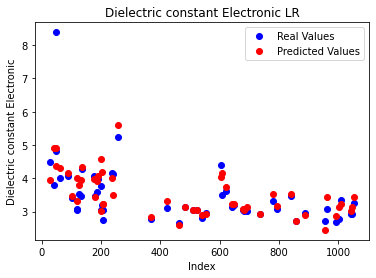

In [67]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_LR=np.zeros(len(y_dielectric_elec_test))

for i in np.arange(0,len(y_dielectric_elec_test)):
  index_LR[i]=y_dielectric_elec_test.index[i]
  y_dielectric_elec_test_predicted_LR[i]=float(y_dielectric_elec_test_predicted_LR[i])
  y_dielectric_elec_test_LR.iloc[i,0]=float(y_dielectric_elec_test_LR.iloc[i,0])

y_dielectric_elec_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_elec_test_LR.index,y_dielectric_elec_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_LR,y_dielectric_elec_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric constant Electronic')
plt.title('Dielectric constant Electronic LR')
#plt.yticks(rotation=45)
plt.show()


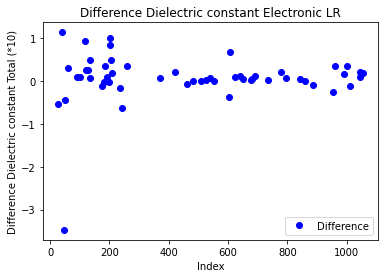

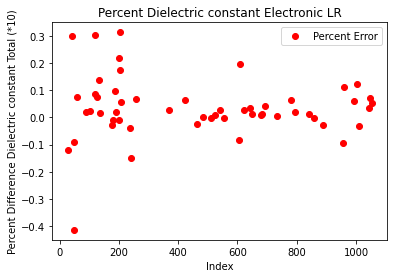

In [68]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_elec_LR=np.zeros(len(y_dielectric_elec_test_LR))

for i in np.arange(0,len(y_dielectric_elec_test_LR)):
  difference_dielectric_elec_LR[i]=y_dielectric_elec_test_predicted_LR[i]- y_dielectric_elec_test_LR.iloc[i,0]

plt.plot(y_dielectric_elec_test_LR.index,difference_dielectric_elec_LR, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total (*10)')
plt.title('Difference Dielectric constant Electronic LR')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_elec_LR=np.zeros(len(y_dielectric_elec_test_LR))

for i in np.arange(0,len(y_dielectric_elec_test_LR)):
  percent_error_dielectric_elec_LR[i]=difference_dielectric_elec_LR[i]/y_dielectric_elec_test_LR.iloc[i,0]


plt.plot(y_dielectric_elec_test_LR.index,percent_error_dielectric_elec_LR, 'ro',label='Percent Error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Total (*10)')
plt.title('Percent Dielectric constant Electronic LR')
#plt.yticks(rotation=45)
plt.show()

**Support Vector Machine(SVM)**

In [124]:
x_dielectric_elec_train_SVM, x_dielectric_elec_test_SVM, y_dielectric_elec_train_SVM, y_dielectric_elec_test_SVM = sklearn.model_selection.train_test_split(x_data, y_dielectric_electronic, test_size=0.05, random_state=1)


In [125]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_dielectric_elec_train_SVM, y_dielectric_elec_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
y_dielectric_elec_test_SVM_predicted = classifier_svm.predict(x_dielectric_elec_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


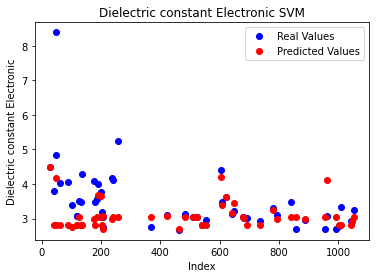

In [128]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_dielectric_elec_test_SVM))

for i in np.arange(0,len(y_dielectric_elec_test_SVM)):
  index_SVM[i]=y_dielectric_elec_test_SVM.index[i]
  y_dielectric_elec_test_SVM_predicted[i]=float(y_dielectric_elec_test_SVM_predicted[i])
  y_dielectric_elec_test_SVM.iloc[i,0]=float(y_dielectric_elec_test_SVM.iloc[i,0])

y_dielectric_elec_test_SVM.to_numpy()
         


plt.plot(y_dielectric_elec_test_SVM.index,y_dielectric_elec_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_dielectric_elec_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric constant Electronic')
plt.title('Dielectric constant Electronic SVM')
#plt.yticks(rotation=45)
plt.show()


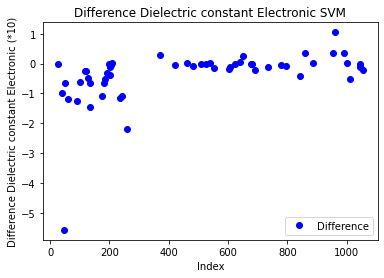

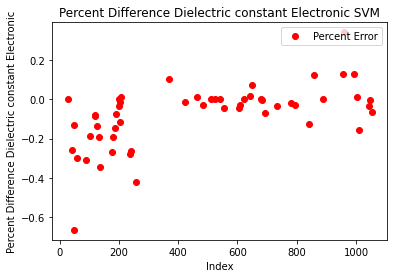

In [129]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_elec_SVM=np.zeros(len(y_dielectric_elec_test_SVM))

for i in np.arange(0,len(y_dielectric_elec_test_SVM)):
  difference_dielectric_elec_SVM[i]=y_dielectric_elec_test_SVM_predicted[i]- y_dielectric_elec_test_SVM.iloc[i,0]

plt.plot(y_dielectric_elec_test_SVM.index,difference_dielectric_elec_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Electronic (*10)')
plt.title('Difference Dielectric constant Electronic SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_elec_SVM=np.zeros(len(y_dielectric_elec_test_SVM))

for i in np.arange(0,len(y_dielectric_elec_test_SVM)):
  percent_error_dielectric_elec_SVM[i]=difference_dielectric_elec_SVM[i]/y_dielectric_elec_test_SVM.iloc[i,0]


plt.plot(y_dielectric_elec_test_SVM.index,percent_error_dielectric_elec_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Electronic')
plt.title('Percent Difference Dielectric constant Electronic SVM')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [239]:
x_dielectric_elec_train_lasso, x_dielectric_elec_test_lasso, y_dielectric_elec_train_lasso, y_dielectric_elec_test_lasso = sklearn.model_selection.train_test_split(x_data, y_dielectric_electronic, test_size=0.05, random_state=1)


In [240]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_dielectric_elec_train_lasso, y_dielectric_elec_train_lasso)

y_dielectric_elec_test_predicted_lasso = lasso.predict(x_dielectric_elec_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


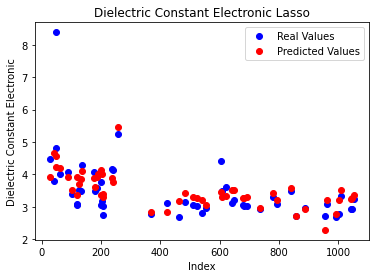

In [241]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_dielectric_elec_lasso=np.zeros(len(y_dielectric_elec_test_lasso))

for i in np.arange(0,len(y_dielectric_elec_test_LR)):
  index_dielectric_elec_lasso[i]=y_dielectric_elec_test_lasso.index[i]
  y_dielectric_elec_test_predicted_lasso[i]=float(y_dielectric_elec_test_predicted_lasso[i])
  y_dielectric_elec_test_lasso.iloc[i,0]=float(y_dielectric_elec_test_lasso.iloc[i,0])

y_dielectric_elec_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_elec_test_lasso.index,y_dielectric_elec_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_dielectric_elec_lasso,y_dielectric_elec_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric Constant Electronic')
plt.title('Dielectric Constant Electronic Lasso')
#plt.yticks(rotation=45)
plt.show()


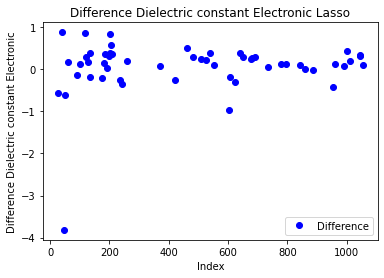

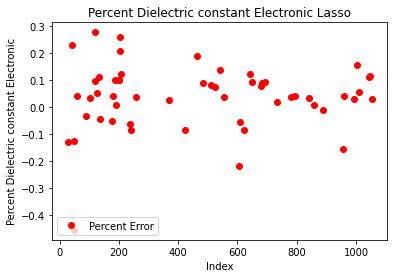

In [242]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_elec_lasso=np.zeros(len(y_dielectric_elec_test_lasso))

for i in np.arange(0,len(y_dielectric_elec_test_lasso)):
  difference_dielectric_elec_lasso[i]=y_dielectric_elec_test_predicted_lasso[i]- y_dielectric_elec_test_lasso.iloc[i,0]

plt.plot(y_dielectric_elec_test_lasso.index,difference_dielectric_elec_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Electronic')
plt.title('Difference Dielectric constant Electronic Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_elec_lasso=np.zeros(len(y_dielectric_elec_test_lasso))

for i in np.arange(0,len(y_dielectric_elec_test_lasso)):
  percent_error_dielectric_elec_lasso[i]=difference_dielectric_elec_lasso[i]/y_dielectric_elec_test_lasso.iloc[i,0]


plt.plot(y_dielectric_elec_test_lasso.index,percent_error_dielectric_elec_lasso, 'ro',label='Percent Error')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Percent Dielectric constant Electronic')
plt.title('Percent Dielectric constant Electronic Lasso')
#plt.yticks(rotation=45)
plt.show()

#Dielectric Constant Ionic

**Linear Regression**

In [69]:
x_dielectric_ion_train_LR, x_dielectric_ion_test_LR, y_dielectric_ion_train_LR, y_dielectric_ion_test_LR = sklearn.model_selection.train_test_split(x_data, y_dielectric_ionic, test_size=0.05, random_state=1)


In [70]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_dielectric_ion_train_LR, y_dielectric_ion_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_dielectric_ion_test_predicted_LR = clf.predict(x_dielectric_ion_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


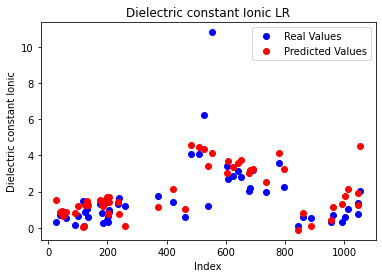

In [84]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_ion_LR=np.zeros(len(y_dielectric_ion_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_ion_LR[i]=y_dielectric_ion_test_LR.index[i]
  y_dielectric_ion_test_predicted_LR[i]=float(y_dielectric_ion_test_predicted_LR[i])
  y_dielectric_ion_test_LR.iloc[i,0]=float(y_dielectric_ion_test_LR.iloc[i,0])

y_dielectric_ion_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_ion_test_LR.index,y_dielectric_ion_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_ion_LR,y_dielectric_ion_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric constant Ionic')
plt.title('Dielectric constant Ionic LR')
#plt.yticks(rotation=45)
plt.show()


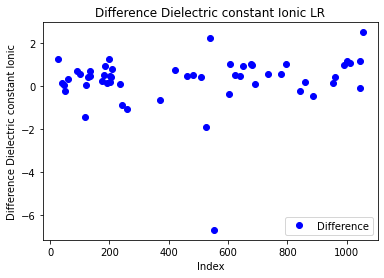

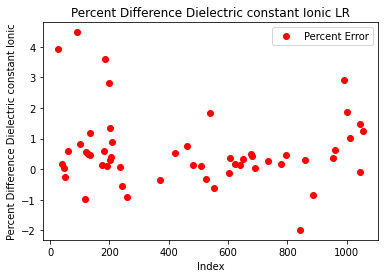

In [85]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_ion_LR=np.zeros(len(y_dielectric_ion_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  difference_dielectric_ion_LR[i]=y_dielectric_ion_test_predicted_LR[i]- y_dielectric_ion_test_LR.iloc[i,0]

plt.plot(y_dielectric_ion_test_LR.index,difference_dielectric_ion_LR, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Ionic')
plt.title('Difference Dielectric constant Ionic LR')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_ion_LR=np.zeros(len(y_dielectric_ion_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  percent_error_dielectric_ion_LR[i]=difference_dielectric_ion_LR[i]/y_dielectric_ion_test_LR.iloc[i,0]


plt.plot(y_dielectric_ion_test_LR.index,percent_error_dielectric_ion_LR, 'ro',label='Percent Error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Ionic')
plt.title('Percent Difference Dielectric constant Ionic LR')
#plt.yticks(rotation=45)
plt.show()

**Support Vector Machine(SVM)**

In [94]:
x_dielectric_ion_train_SVM, x_dielectric_ion_test_SVM, y_dielectric_ion_train_SVM, y_dielectric_ion_test_SVM = sklearn.model_selection.train_test_split(x_data, y_dielectric_ionic, test_size=0.1, random_state=1)


In [95]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_dielectric_ion_train_SVM, y_dielectric_ion_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
y_dielectric_ion_test_SVM_predicted = classifier_svm.predict(x_dielectric_ion_test_SVM)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


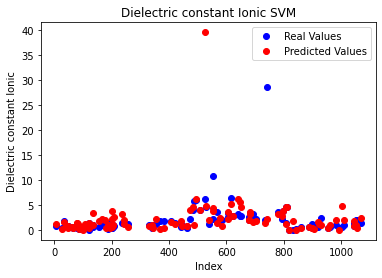

In [97]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_dielectric_ion_test_SVM))

for i in np.arange(0,len(y_dielectric_ion_test_SVM)):
  index_SVM[i]=y_dielectric_ion_test_SVM.index[i]
  y_dielectric_ion_test_SVM_predicted[i]=float(y_dielectric_ion_test_SVM_predicted[i])
  y_dielectric_ion_test_SVM.iloc[i,0]=float(y_dielectric_ion_test_SVM.iloc[i,0])

y_dielectric_ion_test_SVM.to_numpy()       


plt.plot(y_dielectric_ion_test_SVM.index,y_dielectric_ion_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_dielectric_ion_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
#plt.yticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Dielectric constant Ionic')
plt.title('Dielectric constant Ionic SVM')
plt.show()


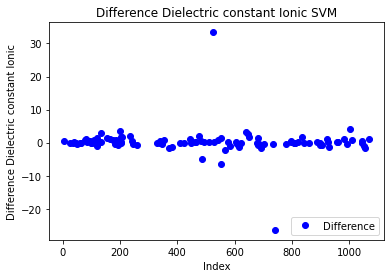

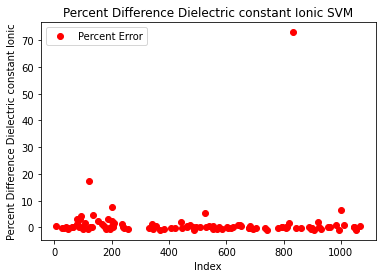

In [102]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_ion_SVM=np.zeros(len(y_dielectric_ion_test_SVM))

for i in np.arange(0,len(y_dielectric_ion_test_SVM)):
  difference_dielectric_ion_SVM[i]=y_dielectric_ion_test_SVM_predicted[i]- y_dielectric_ion_test_SVM.iloc[i,0]

plt.plot(y_dielectric_ion_test_SVM.index,difference_dielectric_ion_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Ionic')
plt.title('Difference Dielectric constant Ionic SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_ion_SVM=np.zeros(len(y_dielectric_ion_test_SVM))

for i in np.arange(0,len(y_dielectric_ion_test_SVM)):
  percent_error_dielectric_ion_SVM[i]=difference_dielectric_ion_SVM[i]/y_dielectric_ion_test_SVM.iloc[i,0]


plt.plot(y_dielectric_ion_test_SVM.index,percent_error_dielectric_ion_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Ionic')
plt.title('Percent Difference Dielectric constant Ionic SVM')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [235]:
x_dielectric_ion_train_lasso, x_dielectric_ion_test_lasso, y_dielectric_ion_train_lasso, y_dielectric_ion_test_lasso = sklearn.model_selection.train_test_split(x_data, y_dielectric_ionic, test_size=0.05, random_state=1)


In [236]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_dielectric_ion_train_lasso, y_dielectric_ion_train_lasso)

y_dielectric_ion_test_predicted_lasso = lasso.predict(x_dielectric_ion_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


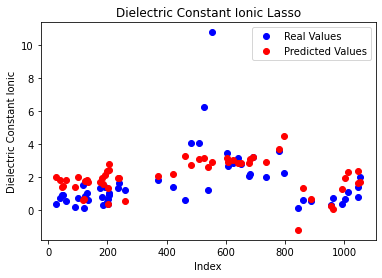

In [237]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_dielectric_ion_lasso=np.zeros(len(y_dielectric_ion_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_dielectric_ion_lasso[i]=y_dielectric_ion_test_lasso.index[i]
  y_dielectric_ion_test_predicted_lasso[i]=float(y_dielectric_ion_test_predicted_lasso[i])
  y_dielectric_ion_test_lasso.iloc[i,0]=float(y_dielectric_ion_test_lasso.iloc[i,0])

y_dielectric_ion_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_ion_test_lasso.index,y_dielectric_ion_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_dielectric_ion_lasso,y_dielectric_ion_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric Constant Ionic')
plt.title('Dielectric Constant Ionic Lasso')
#plt.yticks(rotation=45)
plt.show()


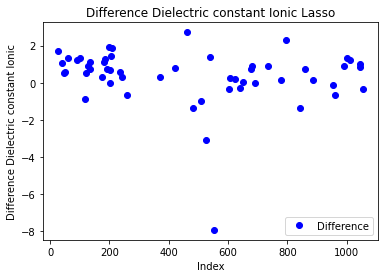

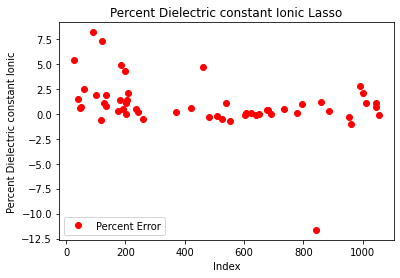

In [238]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_ion_lasso=np.zeros(len(y_dielectric_ion_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_lasso)):
  difference_dielectric_ion_lasso[i]=y_dielectric_ion_test_predicted_lasso[i]- y_dielectric_ion_test_lasso.iloc[i,0]

plt.plot(y_dielectric_ion_test_lasso.index,difference_dielectric_ion_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Ionic')
plt.title('Difference Dielectric constant Ionic Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_ion_lasso=np.zeros(len(y_dielectric_ion_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_lasso)):
  percent_error_dielectric_ion_lasso[i]=difference_dielectric_ion_lasso[i]/y_dielectric_ion_test_lasso.iloc[i,0]


plt.plot(y_dielectric_ion_test_lasso.index,percent_error_dielectric_ion_lasso, 'ro',label='Percent Error')
plt.legend(loc='lower left')
plt.xlabel('Index')
plt.ylabel('Percent Dielectric constant Ionic')
plt.title('Percent Dielectric constant Ionic Lasso')
#plt.yticks(rotation=45)
plt.show()

#Dielectric Constant Total

**Linear Regression**

In [103]:
x_dielectric_total_train_LR, x_dielectric_total_test_LR, y_dielectric_total_train_LR, y_dielectric_total_test_LR = sklearn.model_selection.train_test_split(x_data, y_dielectric_total, test_size=0.05, random_state=1)


In [104]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_dielectric_total_train_LR, y_dielectric_total_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_dielectric_total_test_predicted_LR = clf.predict(x_dielectric_total_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


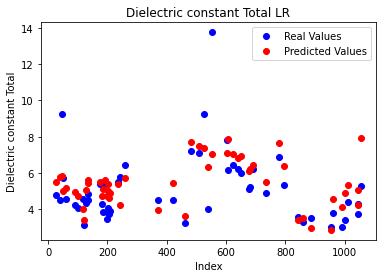

In [107]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_total_LR=np.zeros(len(y_dielectric_total_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_total_LR[i]=y_dielectric_total_test_LR.index[i]
  y_dielectric_total_test_predicted_LR[i]=float(y_dielectric_total_test_predicted_LR[i])
  y_dielectric_total_test_LR.iloc[i,0]=float(y_dielectric_total_test_LR.iloc[i,0])

y_dielectric_total_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_total_test_LR.index,y_dielectric_total_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_total_LR,y_dielectric_total_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Dielectric constant Total')
plt.title('Dielectric constant Total LR')
#plt.yticks(rotation=45)
plt.show()


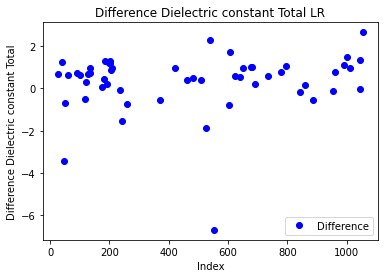

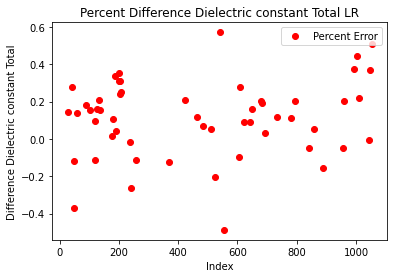

In [108]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_total_LR=np.zeros(len(y_dielectric_total_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  difference_dielectric_total_LR[i]=y_dielectric_total_test_predicted_LR[i]- y_dielectric_total_test_LR.iloc[i,0]

plt.plot(y_dielectric_total_test_LR.index,difference_dielectric_total_LR, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total')
plt.title('Difference Dielectric constant Total LR')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_total_LR=np.zeros(len(y_dielectric_total_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  percent_error_dielectric_total_LR[i]=difference_dielectric_total_LR[i]/y_dielectric_total_test_LR.iloc[i,0]


plt.plot(y_dielectric_total_test_LR.index,percent_error_dielectric_total_LR, 'ro',label='Percent Error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total')
plt.title('Percent Difference Dielectric constant Total LR')
#plt.yticks(rotation=45)
plt.show()

**Support Vector Machine(SVM)**

In [149]:
x_dielectric_total_train_SVM, x_dielectric_total_test_SVM, y_dielectric_total_train_SVM, y_dielectric_total_test_SVM = sklearn.model_selection.train_test_split(x_data, y_dielectric_total, test_size=0.1, random_state=1)


In [150]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_dielectric_total_train_SVM, y_dielectric_total_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
y_dielectric_total_test_SVM_predicted = classifier_svm.predict(x_dielectric_total_test_SVM)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


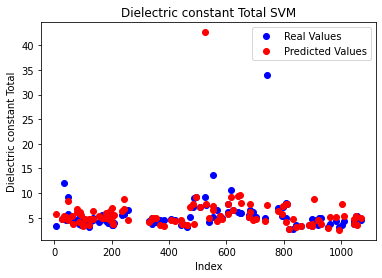

In [152]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_dielectric_total_test_SVM))

for i in np.arange(0,len(y_dielectric_total_test_SVM)):
  index_SVM[i]=y_dielectric_total_test_SVM.index[i]
  y_dielectric_total_test_SVM_predicted[i]=float(y_dielectric_total_test_SVM_predicted[i])
  y_dielectric_total_test_SVM.iloc[i,0]=float(y_dielectric_total_test_SVM.iloc[i,0])

y_dielectric_total_test_SVM.to_numpy()       


plt.plot(y_dielectric_total_test_SVM.index,y_dielectric_total_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_dielectric_total_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
#plt.yticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Dielectric constant Total')
plt.title('Dielectric constant Total SVM')
plt.show()


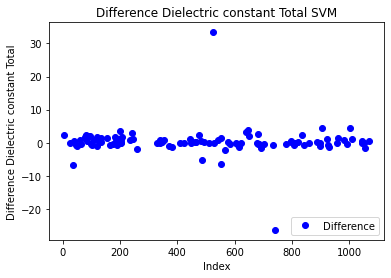

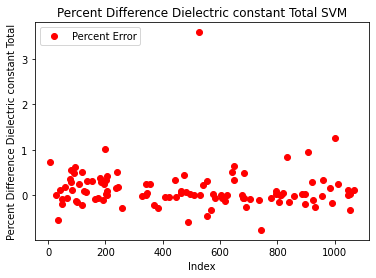

In [153]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_total_SVM=np.zeros(len(y_dielectric_total_test_SVM))

for i in np.arange(0,len(y_dielectric_total_test_SVM)):
  difference_dielectric_total_SVM[i]=y_dielectric_total_test_SVM_predicted[i]- y_dielectric_total_test_SVM.iloc[i,0]

plt.plot(y_dielectric_total_test_SVM.index,difference_dielectric_total_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total')
plt.title('Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_total_SVM=np.zeros(len(y_dielectric_total_test_SVM))

for i in np.arange(0,len(y_dielectric_total_test_SVM)):
  percent_error_dielectric_total_SVM[i]=difference_dielectric_total_SVM[i]/y_dielectric_total_test_SVM.iloc[i,0]


plt.plot(y_dielectric_total_test_SVM.index,percent_error_dielectric_total_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Total')
plt.title('Percent Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [221]:
x_dielectric_total_train_lasso, x_dielectric_total_test_lasso, y_dielectric_total_train_lasso, y_dielectric_total_test_lasso = sklearn.model_selection.train_test_split(x_data, y_dielectric_total, test_size=0.05, random_state=1)


In [222]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_dielectric_total_train_lasso, y_dielectric_total_train_lasso)

y_dielectric_total_test_predicted_lasso = lasso.predict(x_dielectric_total_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


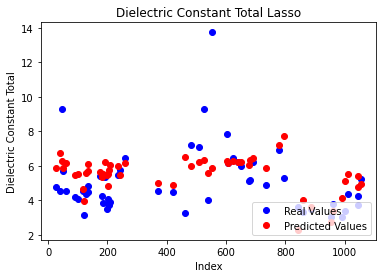

In [228]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_dielectric_total_lasso=np.zeros(len(y_dielectric_total_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_dielectric_total_lasso[i]=y_dielectric_total_test_lasso.index[i]
  y_dielectric_total_test_predicted_lasso[i]=float(y_dielectric_total_test_predicted_lasso[i])
  y_dielectric_total_test_lasso.iloc[i,0]=float(y_dielectric_total_test_lasso.iloc[i,0])

y_dielectric_total_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_dielectric_total_test_lasso.index,y_dielectric_total_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_dielectric_total_lasso,y_dielectric_total_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Dielectric Constant Total')
plt.title('Dielectric Constant Total Lasso')
#plt.yticks(rotation=45)
plt.show()


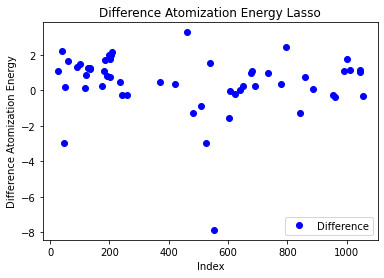

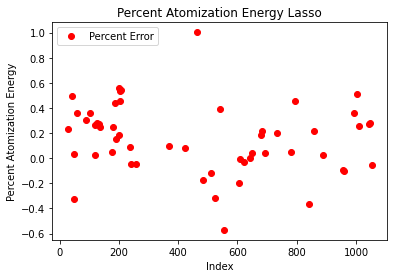

In [227]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_dielectric_total_lasso=np.zeros(len(y_dielectric_total_test_lasso))

for i in np.arange(0,len(y_dielectric_total_test_lasso)):
  difference_dielectric_total_lasso[i]=y_dielectric_total_test_predicted_lasso[i]- y_dielectric_total_test_lasso.iloc[i,0]

plt.plot(y_dielectric_total_test_lasso.index,difference_dielectric_total_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Atomization Energy')
plt.title('Difference Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_dielectric_total_lasso=np.zeros(len(y_dielectric_total_test_lasso))

for i in np.arange(0,len(y_dielectric_total_test_lasso)):
  percent_error_dielectric_total_lasso[i]=difference_dielectric_total_lasso[i]/y_dielectric_total_test_lasso.iloc[i,0]


plt.plot(y_dielectric_total_test_lasso.index,percent_error_dielectric_total_lasso, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Atomization Energy')
plt.title('Percent Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()

#Band GAP CGA Level

**Linear Regression**

In [139]:
x_band_gap_CGA_train_LR, x_band_gap_CGA_test_LR, y_band_gap_CGA_train_LR, y_band_gap_CGA_test_LR = sklearn.model_selection.train_test_split(x_data, y_band_gap_CGA, test_size=0.05, random_state=1)


In [140]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_band_gap_CGA_train_LR, y_band_gap_CGA_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
y_band_gap_CGA_test_predicted_LR = clf.predict(x_band_gap_CGA_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


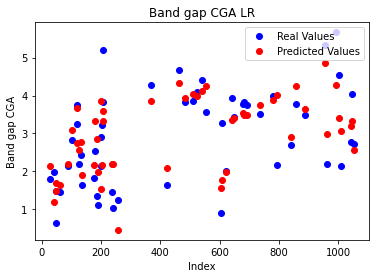

In [142]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_band_gap_CGA_LR=np.zeros(len(y_band_gap_CGA_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_band_gap_CGA_LR[i]=y_band_gap_CGA_test_LR.index[i]
  y_band_gap_CGA_test_predicted_LR[i]=float(y_band_gap_CGA_test_predicted_LR[i])
  y_band_gap_CGA_test_LR.iloc[i,0]=float(y_band_gap_CGA_test_LR.iloc[i,0])

y_band_gap_CGA_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_band_gap_CGA_test_LR.index,y_band_gap_CGA_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_band_gap_CGA_LR,y_band_gap_CGA_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Band gap CGA')
plt.title('Band gap CGA LR')
#plt.yticks(rotation=45)
plt.show()


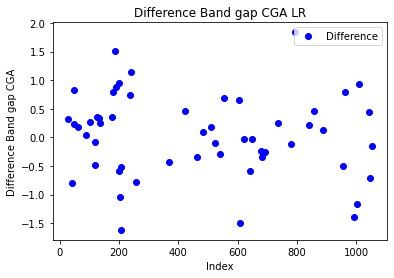

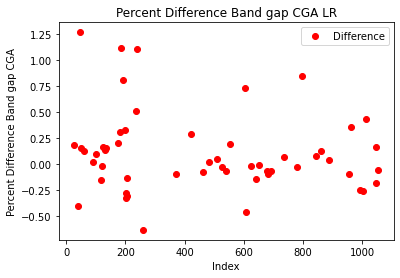

In [143]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_CGA_LR=np.zeros(len(y_band_gap_CGA_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  difference_band_gap_CGA_LR[i]=y_band_gap_CGA_test_predicted_LR[i]- y_band_gap_CGA_test_LR.iloc[i,0]

plt.plot(y_band_gap_CGA_test_LR.index,difference_band_gap_CGA_LR, 'bo',label='Difference')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Difference Band gap CGA')
plt.title('Difference Band gap CGA LR')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_CGA_LR=np.zeros(len(y_band_gap_CGA_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  percent_error_band_gap_CGA_LR[i]=difference_band_gap_CGA_LR[i]/y_band_gap_CGA_test_LR.iloc[i,0]


plt.plot(y_band_gap_CGA_test_LR.index,percent_error_band_gap_CGA_LR, 'ro',label='Difference')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Percent Difference Band gap CGA')
plt.title('Percent Difference Band gap CGA LR')
#plt.yticks(rotation=45)
plt.show()


**Support Vector Machine(SVM)**

In [158]:
x_band_gap_CGA_train_SVM, x_band_gap_CGA_test_SVM, y_band_gap_CGA_train_SVM, y_band_gap_CGA_test_SVM = sklearn.model_selection.train_test_split(x_data, y_band_gap_CGA, test_size=0.1, random_state=1)


In [159]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_band_gap_CGA_train_SVM, y_band_gap_CGA_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [160]:
y_band_gap_CGA_test_SVM_predicted = classifier_svm.predict(x_band_gap_CGA_test_SVM)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


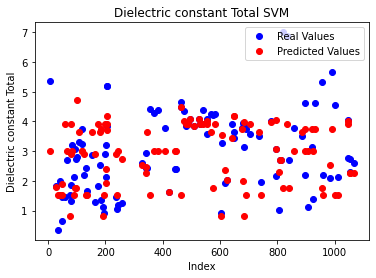

In [162]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_band_gap_CGA_test_SVM))

for i in np.arange(0,len(y_band_gap_CGA_test_SVM)):
  index_SVM[i]=y_band_gap_CGA_test_SVM.index[i]
  y_band_gap_CGA_test_SVM_predicted[i]=float(y_band_gap_CGA_test_SVM_predicted[i])
  y_band_gap_CGA_test_SVM.iloc[i,0]=float(y_band_gap_CGA_test_SVM.iloc[i,0])

y_band_gap_CGA_test_SVM.to_numpy()       


plt.plot(y_band_gap_CGA_test_SVM.index,y_band_gap_CGA_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_band_gap_CGA_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
#plt.yticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Dielectric constant Total')
plt.title('Dielectric constant Total SVM')
plt.show()


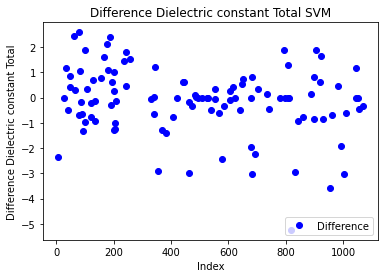

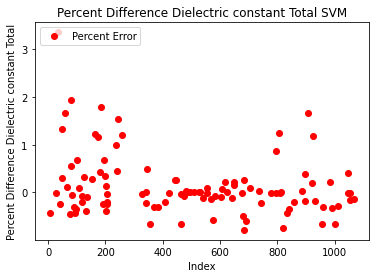

In [213]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_CGA_SVM=np.zeros(len(y_band_gap_CGA_test_SVM))

for i in np.arange(0,len(y_band_gap_CGA_test_SVM)):
  difference_band_gap_CGA_SVM[i]=y_band_gap_CGA_test_SVM_predicted[i]- y_band_gap_CGA_test_SVM.iloc[i,0]

plt.plot(y_band_gap_CGA_test_SVM.index,difference_band_gap_CGA_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total')
plt.title('Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_CGA_SVM=np.zeros(len(y_band_gap_CGA_test_SVM))

for i in np.arange(0,len(y_band_gap_CGA_test_SVM)):
  percent_error_band_gap_CGA_SVM[i]=difference_band_gap_CGA_SVM[i]/y_band_gap_CGA_test_SVM.iloc[i,0]


plt.plot(y_band_gap_CGA_test_SVM.index,percent_error_band_gap_CGA_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Total')
plt.title('Percent Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [214]:
x_band_gap_CGA_train_lasso, x_band_gap_CGA_test_lasso, y_band_gap_CGA_train_lasso, y_band_gap_CGA_test_lasso = sklearn.model_selection.train_test_split(x_data, y_band_gap_CGA, test_size=0.05, random_state=1)


In [215]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_band_gap_CGA_train_lasso, y_band_gap_CGA_train_lasso)

y_band_gap_CGA_test_predicted_lasso = lasso.predict(x_band_gap_CGA_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


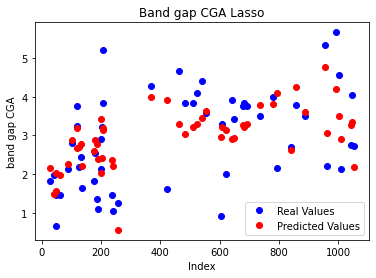

In [226]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_band_gap_CGA_lasso=np.zeros(len(y_band_gap_CGA_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_band_gap_CGA_lasso[i]=y_band_gap_CGA_test_lasso.index[i]
  y_band_gap_CGA_test_predicted_lasso[i]=float(y_band_gap_CGA_test_predicted_lasso[i])
  y_band_gap_CGA_test_lasso.iloc[i,0]=float(y_band_gap_CGA_test_lasso.iloc[i,0])

y_band_gap_CGA_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_band_gap_CGA_test_lasso.index,y_band_gap_CGA_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_band_gap_CGA_lasso,y_band_gap_CGA_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('band gap CGA')
plt.title('Band gap CGA Lasso')
#plt.yticks(rotation=45)
plt.show()


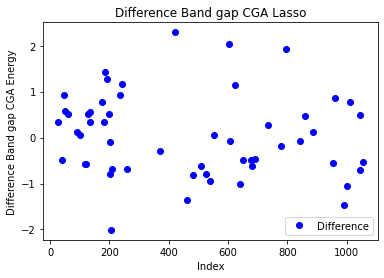

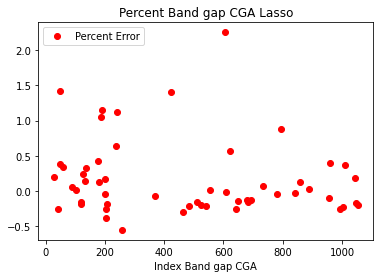

In [225]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_CGA_lasso=np.zeros(len(y_band_gap_CGA_test_lasso))

for i in np.arange(0,len(y_band_gap_CGA_test_lasso)):
  difference_band_gap_CGA_lasso[i]=y_band_gap_CGA_test_predicted_lasso[i]- y_band_gap_CGA_test_lasso.iloc[i,0]

plt.plot(y_band_gap_CGA_test_lasso.index,difference_band_gap_CGA_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Band gap CGA Energy')
plt.title('Difference Band gap CGA Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_CGA_lasso=np.zeros(len(y_band_gap_CGA_test_lasso))

for i in np.arange(0,len(y_band_gap_CGA_test_lasso)):
  percent_error_band_gap_CGA_lasso[i]=difference_band_gap_CGA_lasso[i]/y_band_gap_CGA_test_lasso.iloc[i,0]


plt.plot(y_band_gap_CGA_test_lasso.index,percent_error_band_gap_CGA_lasso, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index Band gap CGA')
plt.title('Percent Band gap CGA Lasso')
#plt.yticks(rotation=45)
plt.show()

#Band GAP HSE06 Level

**Linear Regression**

In [144]:
x_band_gap_HSE06_train_LR, x_band_gap_HSE06_test_LR, y_band_gap_HSE06_train_LR, y_band_gap_HSE06_test_LR = sklearn.model_selection.train_test_split(x_data, y_band_gap_HSE06, test_size=0.05, random_state=1)


In [145]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_band_gap_HSE06_train_LR, y_band_gap_HSE06_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
y_band_gap_HSE06_test_predicted_LR = clf.predict(x_band_gap_HSE06_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


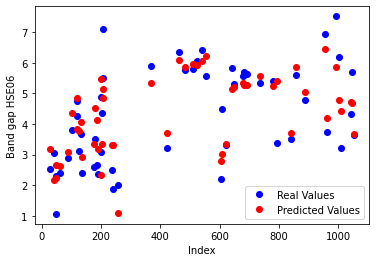

In [147]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_band_gap_HSE06_LR=np.zeros(len(y_band_gap_HSE06_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_band_gap_HSE06_LR[i]=y_band_gap_HSE06_test_LR.index[i]
  y_band_gap_HSE06_test_predicted_LR[i]=float(y_band_gap_HSE06_test_predicted_LR[i])
  y_band_gap_HSE06_test_LR.iloc[i,0]=float(y_band_gap_HSE06_test_LR.iloc[i,0])

y_band_gap_HSE06_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_band_gap_HSE06_test_LR.index,y_band_gap_HSE06_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_band_gap_HSE06_LR,y_band_gap_HSE06_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Band gap HSE06')
#plt.yticks(rotation=45)
plt.show()


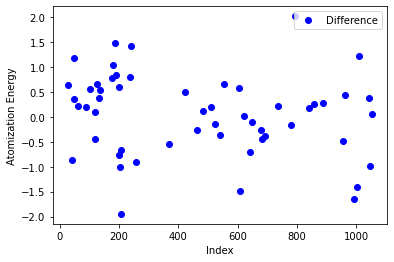

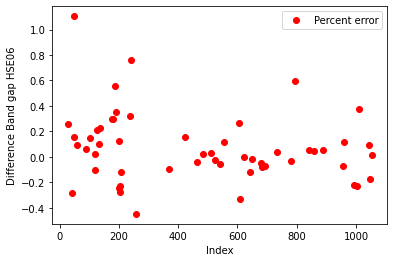

In [148]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_HSE06_LR=np.zeros(len(y_band_gap_HSE06_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  difference_band_gap_HSE06_LR[i]=y_band_gap_HSE06_test_predicted_LR[i]- y_band_gap_HSE06_test_LR.iloc[i,0]

plt.plot(y_band_gap_HSE06_test_LR.index,difference_band_gap_HSE06_LR, 'bo',label='Difference')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_HSE06_LR=np.zeros(len(y_band_gap_CGA_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  percent_error_band_gap_HSE06_LR[i]=difference_band_gap_HSE06_LR[i]/y_band_gap_HSE06_test_LR.iloc[i,0]


plt.plot(y_band_gap_HSE06_test_LR.index,percent_error_band_gap_HSE06_LR, 'ro',label='Percent error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Difference Band gap HSE06')
#plt.yticks(rotation=45)
plt.show()

**Support Vector Machine(SVM)**

In [164]:
x_band_gap_HSE06_train_SVM, x_band_gap_HSE06_test_SVM, y_band_gap_HSE06_train_SVM, y_band_gap_HSE06_test_SVM = sklearn.model_selection.train_test_split(x_data, y_band_gap_HSE06, test_size=0.1, random_state=1)


In [166]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_band_gap_HSE06_train_SVM, y_band_gap_HSE06_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
y_band_gap_HSE06_test_SVM_predicted = classifier_svm.predict(x_band_gap_HSE06_test_SVM)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


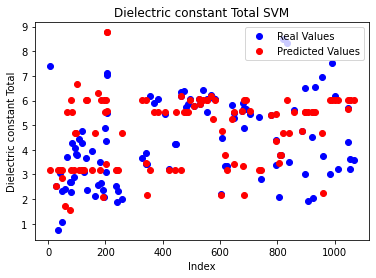

In [168]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_band_gap_HSE06_test_SVM))

for i in np.arange(0,len(y_band_gap_HSE06_test_SVM)):
  index_SVM[i]=y_band_gap_HSE06_test_SVM.index[i]
  y_band_gap_HSE06_test_SVM_predicted[i]=float(y_band_gap_HSE06_test_SVM_predicted[i])
  y_band_gap_HSE06_test_SVM.iloc[i,0]=float(y_band_gap_HSE06_test_SVM.iloc[i,0])

y_band_gap_CGA_test_SVM.to_numpy()       


plt.plot(y_band_gap_HSE06_test_SVM.index,y_band_gap_HSE06_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_band_gap_HSE06_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
#plt.yticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Dielectric constant Total')
plt.title('Dielectric constant Total SVM')
plt.show()


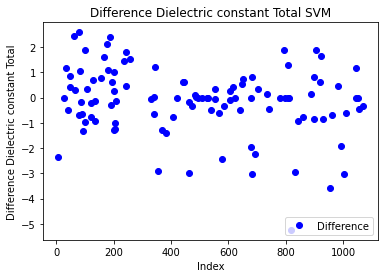

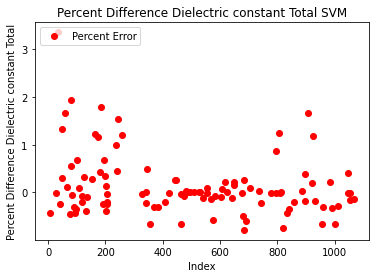

In [ ]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_HSE06_SVM=np.zeros(len(y_band_gap_HSE06_test_SVM))

for i in np.arange(0,len(y_band_gap_HSE06_test_SVM)):
  difference_band_gap_HSE06_SVM[i]=y_band_gap_HSE06_test_SVM_predicted[i]- y_band_gap_HSE06_test_SVM.iloc[i,0]

plt.plot(y_band_gap_HSE06_test_SVM.index,difference_band_gap_HSE06_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total')
plt.title('Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_HSE06_SVM=np.zeros(len(y_band_gap_HSE06_test_SVM))

for i in np.arange(0,len(y_band_gap_CGA_test_SVM)):
  percent_error_band_gap_CGA_SVM[i]=difference_band_gap_CGA_SVM[i]/y_band_gap_CGA_test_SVM.iloc[i,0]


plt.plot(y_band_gap_CGA_test_SVM.index,percent_error_band_gap_CGA_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Difference Dielectric constant Total')
plt.title('Percent Difference Dielectric constant Total SVM')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [209]:
x_band_gap_HSE06_train_lasso, x_band_gap_HSE06_test_lasso, y_band_gap_HSE06_train_lasso, y_band_gap_HSE06_test_lasso = sklearn.model_selection.train_test_split(x_data, y_band_gap_HSE06, test_size=0.05, random_state=1)


In [210]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_band_gap_HSE06_train_lasso, y_band_gap_HSE06_train_lasso)

y_band_gap_HSE06_test_predicted_lasso = lasso.predict(x_band_gap_HSE06_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


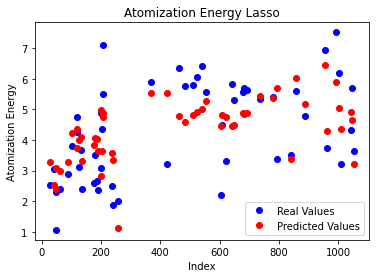

In [211]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_band_gap_HSE06_lasso=np.zeros(len(y_band_gap_HSE06_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_band_gap_HSE06_lasso[i]=y_band_gap_HSE06_test_lasso.index[i]
  y_band_gap_HSE06_test_predicted_lasso[i]=float(y_band_gap_HSE06_test_predicted_lasso[i])
  y_band_gap_HSE06_test_lasso.iloc[i,0]=float(y_band_gap_HSE06_test_lasso.iloc[i,0])

y_band_gap_HSE06_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_band_gap_HSE06_test_lasso.index,y_band_gap_HSE06_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_band_gap_HSE06_lasso,y_band_gap_HSE06_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
plt.title('Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()


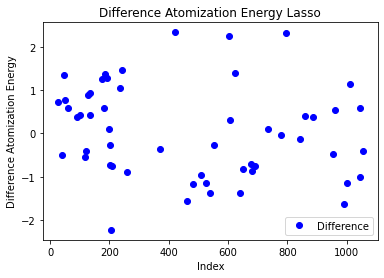

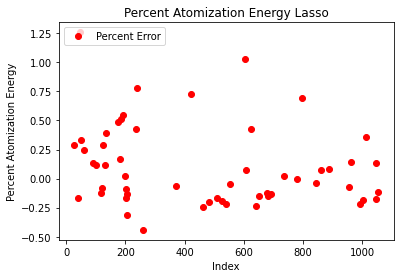

In [212]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_band_gap_HSE06_lasso=np.zeros(len(y_band_gap_HSE06_test_lasso))

for i in np.arange(0,len(y_band_gap_HSE06_test_lasso)):
  difference_band_gap_HSE06_lasso[i]=y_band_gap_HSE06_test_predicted_lasso[i]- y_band_gap_HSE06_test_lasso.iloc[i,0]

plt.plot(y_band_gap_HSE06_test_lasso.index,difference_band_gap_HSE06_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Atomization Energy')
plt.title('Difference Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_band_gap_HSE06_lasso=np.zeros(len(y_band_gap_HSE06_test_lasso))

for i in np.arange(0,len(y_band_gap_HSE06_test_lasso)):
  percent_error_band_gap_HSE06_lasso[i]=difference_band_gap_HSE06_lasso[i]/y_band_gap_HSE06_test_lasso.iloc[i,0]


plt.plot(y_band_gap_HSE06_test_lasso.index,percent_error_band_gap_HSE06_lasso, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Atomization Energy')
plt.title('Percent Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()

# Atomization Energy

**Linear Regression**

In [ ]:
x_atomization_energy_train_LR, x_atomization_energy_test_LR, y_atomization_energy_train_LR, y_atomization_energy_test_LR = sklearn.model_selection.train_test_split(x_data, y_atomization_energy, test_size=0.05, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_atomization_energy_train_LR, y_atomization_energy_train_LR)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_atomization_energy_test_predicted_LR = clf.predict(x_atomization_energy_test_LR)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


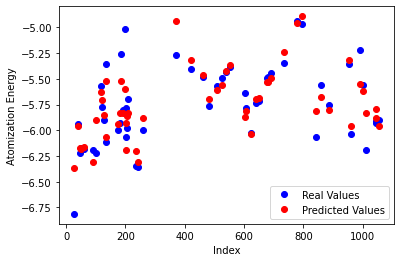

In [ ]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_atomization_energy_LR=np.zeros(len(y_atomization_energy_test_LR))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_atomization_energy_LR[i]=y_atomization_energy_test_LR.index[i]
  y_atomization_energy_test_predicted_LR[i]=float(y_atomization_energy_test_predicted_LR[i])
  y_atomization_energy_test_LR.iloc[i,0]=float(y_atomization_energy_test_LR.iloc[i,0])

y_atomization_energy_test_LR.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_atomization_energy_test_LR.index,y_atomization_energy_test_LR.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_atomization_energy_LR,y_atomization_energy_test_predicted_LR, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
#plt.yticks(rotation=45)
plt.show()


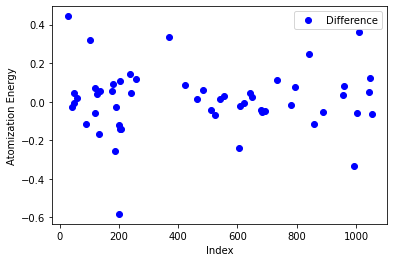

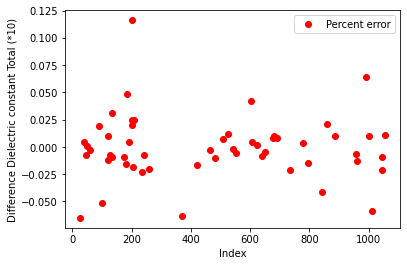

In [ ]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_atomization_energy_LR=np.zeros(len(y_atomization_energy_test_LR))

for i in np.arange(0,len(y_atomization_energy_test_LR)):
  difference_atomization_energy_LR[i]=y_atomization_energy_test_predicted_LR[i]- y_atomization_energy_test_LR.iloc[i,0]

plt.plot(y_atomization_energy_test_LR.index,difference_atomization_energy_LR, 'bo',label='Difference')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
#plt.yticks(rotation=45)
plt.show()


percent_error_atomization_energy_LR=np.zeros(len(y_band_gap_CGA_test_LR))

for i in np.arange(0,len(y_atomization_energy_test_LR)):
  percent_error_atomization_energy_LR[i]=difference_atomization_energy_LR[i]/y_atomization_energy_test_LR.iloc[i,0]


plt.plot(y_atomization_energy_test_LR.index,percent_error_atomization_energy_LR, 'ro',label='Percent error')
plt.legend(loc='upper right')
plt.xlabel('Index')
plt.ylabel('Difference Dielectric constant Total (*10)')
#plt.yticks(rotation=45)
plt.show()

**Support Vector Machine(SVM)**

In [169]:
x_atomization_energy_train_SVM, x_atomization_energy_test_SVM, y_atomization_energy_train_SVM, y_atomization_energy_test_SVM = sklearn.model_selection.train_test_split(x_data, y_atomization_energy, test_size=0.1, random_state=1)


In [170]:
classifier_svm = svm.SVC(gamma=0.01)
classifier_svm.fit(x_atomization_energy_train_SVM, y_atomization_energy_train_SVM)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [171]:
y_atomization_energy_test_SVM_predicted = classifier_svm.predict(x_atomization_energy_test_SVM)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


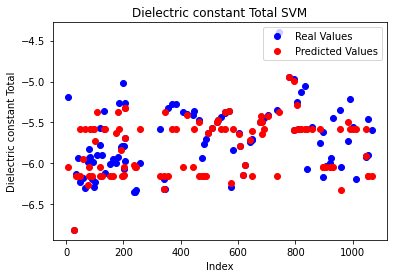

In [172]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_SVM=np.zeros(len(y_atomization_energy_test_SVM))

for i in np.arange(0,len(y_atomization_energy_test_SVM)):
  index_SVM[i]=y_atomization_energy_test_SVM.index[i]
  y_atomization_energy_test_SVM_predicted[i]=float(y_atomization_energy_test_SVM_predicted[i])
  y_atomization_energy_test_SVM.iloc[i,0]=float(y_atomization_energy_test_SVM.iloc[i,0])

y_atomization_energy_test_SVM.to_numpy()       


plt.plot(y_atomization_energy_test_SVM.index,y_atomization_energy_test_SVM.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_SVM,y_atomization_energy_test_SVM_predicted, 'ro',label='Predicted Values')
plt.legend(loc='upper right')
#plt.yticks(rotation=45)
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
plt.title('Atomization Energy SVM')
plt.show()


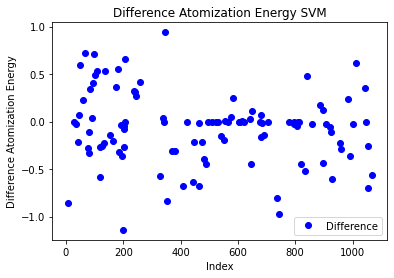

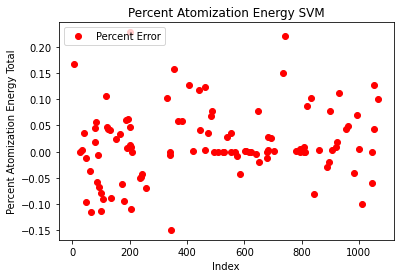

In [185]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_atomization_energy_SVM=np.zeros(len(y_atomization_energy_test_SVM))

for i in np.arange(0,len(y_atomization_energy_test_SVM)):
  difference_atomization_energy_SVM[i]=y_atomization_energy_test_SVM_predicted[i]- y_atomization_energy_test_SVM.iloc[i,0]

plt.plot(y_atomization_energy_test_SVM.index,difference_atomization_energy_SVM, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Atomization Energy')
plt.title('Difference Atomization Energy SVM')
#plt.yticks(rotation=45)
plt.show()


percent_error_atomization_energy_SVM=np.zeros(len(y_atomization_energy_test_SVM))

for i in np.arange(0,len(y_band_gap_CGA_test_SVM)):
  percent_error_atomization_energy_SVM[i]=difference_atomization_energy_SVM[i]/y_atomization_energy_test_SVM.iloc[i,0]


plt.plot(y_atomization_energy_test_SVM.index,percent_error_atomization_energy_SVM, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Atomization Energy Total')
plt.title('Percent Atomization Energy SVM')
#plt.yticks(rotation=45)
plt.show()

**Random Forest**

In [190]:
x_atomization_energy_train_RF, x_atomization_energy_test_RF, y_atomization_energy_train_RF, y_atomization_energy_test_RF = sklearn.model_selection.train_test_split(x_data, y_atomization_energy, test_size=0.05, random_state=1)


In [191]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_atomization_energy_train_RF = sc.fit_transform(x_atomization_energy_train_RF)
x_atomization_energy_test_RF = sc.transform(x_atomization_energy_test_RF)

In [192]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_atomization_energy_train_RF, y_atomization_energy_train_RF)
y_atomization_energy_test_predicted_RF = regressor.predict(x_atomization_energy_test_RF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


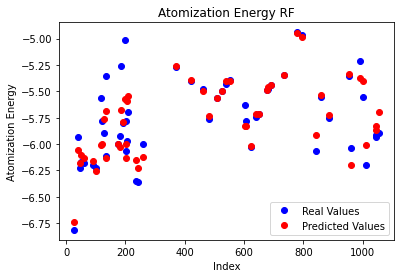

In [193]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_atomization_energy_RF=np.zeros(len(y_atomization_energy_test_RF))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_atomization_energy_RF[i]=y_atomization_energy_test_RF.index[i]
  y_atomization_energy_test_predicted_RF[i]=float(y_atomization_energy_test_predicted_RF[i])
  y_atomization_energy_test_RF.iloc[i,0]=float(y_atomization_energy_test_RF.iloc[i,0])

y_atomization_energy_test_RF.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_atomization_energy_test_RF.index,y_atomization_energy_test_RF.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_atomization_energy_RF,y_atomization_energy_test_predicted_RF, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
plt.title('Atomization Energy RF')
#plt.yticks(rotation=45)
plt.show()


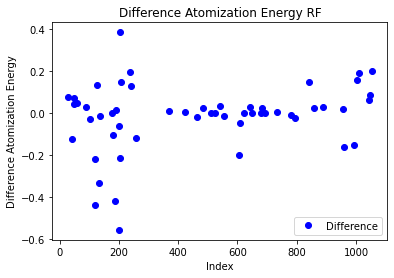

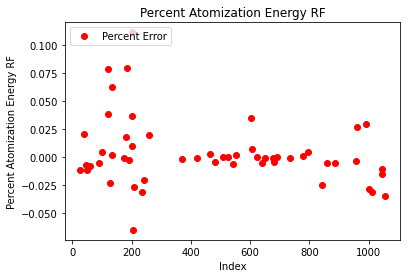

In [200]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_atomization_energy_RF=np.zeros(len(y_atomization_energy_test_RF))

for i in np.arange(0,len(y_atomization_energy_test_RF)):
  difference_atomization_energy_RF[i]=y_atomization_energy_test_predicted_RF[i]- y_atomization_energy_test_RF.iloc[i,0]

plt.plot(y_atomization_energy_test_RF.index,difference_atomization_energy_RF, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Atomization Energy')
plt.title('Difference Atomization Energy RF')
#plt.yticks(rotation=45)
plt.show()


percent_error_atomization_energy_RF=np.zeros(len(y_atomization_energy_test_RF))

for i in np.arange(0,len(y_atomization_energy_test_RF)):
  percent_error_atomization_energy_RF[i]=difference_atomization_energy_RF[i]/y_atomization_energy_test_RF.iloc[i,0]


plt.plot(y_atomization_energy_test_RF.index,percent_error_atomization_energy_RF, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Atomization Energy RF')
plt.title('Percent Atomization Energy RF')
#plt.yticks(rotation=45)
plt.show()

**Lasso**

In [201]:
x_atomization_energy_train_lasso, x_atomization_energy_test_lasso, y_atomization_energy_train_lasso, y_atomization_energy_test_lasso = sklearn.model_selection.train_test_split(x_data, y_atomization_energy, test_size=0.05, random_state=1)


In [205]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_atomization_energy_train_lasso, y_atomization_energy_train_lasso)

y_atomization_energy_test_predicted_lasso = lasso.predict(x_atomization_energy_test_lasso)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


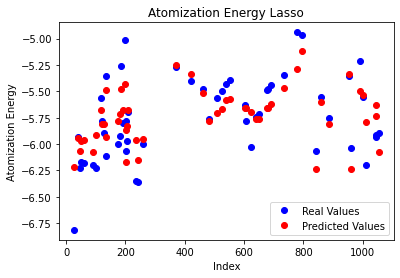

In [207]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
index_atomization_energy_lasso=np.zeros(len(y_atomization_energy_test_lasso))

for i in np.arange(0,len(y_dielectric_ion_test_LR)):
  index_atomization_energy_lasso[i]=y_atomization_energy_test_lasso.index[i]
  y_atomization_energy_test_predicted_lasso[i]=float(y_atomization_energy_test_predicted_lasso[i])
  y_atomization_energy_test_lasso.iloc[i,0]=float(y_atomization_energy_test_lasso.iloc[i,0])

y_atomization_energy_test_lasso.to_numpy()

#print(y_dielectric_elec_test.index)    
#print(y_dielectric_elec_test.iloc[:,0])          


plt.plot(y_atomization_energy_test_lasso.index,y_atomization_energy_test_lasso.iloc[:,0], 'bo',label='Real Values')
plt.plot(index_atomization_energy_lasso,y_atomization_energy_test_predicted_lasso, 'ro',label='Predicted Values')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Atomization Energy')
plt.title('Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()


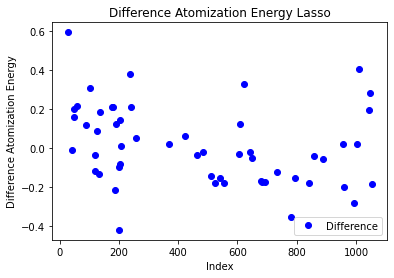

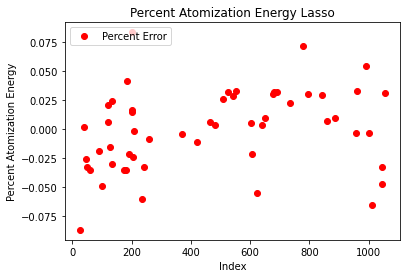

In [208]:
   #np.linspace(start,stop,num)     num=Number of samples to generate             
difference_atomization_energy_lasso=np.zeros(len(y_atomization_energy_test_lasso))

for i in np.arange(0,len(y_atomization_energy_test_lasso)):
  difference_atomization_energy_lasso[i]=y_atomization_energy_test_predicted_lasso[i]- y_atomization_energy_test_lasso.iloc[i,0]

plt.plot(y_atomization_energy_test_lasso.index,difference_atomization_energy_lasso, 'bo',label='Difference')
plt.legend(loc='lower right')
plt.xlabel('Index')
plt.ylabel('Difference Atomization Energy')
plt.title('Difference Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()


percent_error_atomization_energy_lasso=np.zeros(len(y_atomization_energy_test_lasso))

for i in np.arange(0,len(y_atomization_energy_test_lasso)):
  percent_error_atomization_energy_lasso[i]=difference_atomization_energy_lasso[i]/y_atomization_energy_test_lasso.iloc[i,0]


plt.plot(y_atomization_energy_test_lasso.index,percent_error_atomization_energy_lasso, 'ro',label='Percent Error')
plt.legend(loc='upper left')
plt.xlabel('Index')
plt.ylabel('Percent Atomization Energy')
plt.title('Percent Atomization Energy Lasso')
#plt.yticks(rotation=45)
plt.show()